# Customer Campaign Participation Analysis


**Dataset:** [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)


**Dataset description:** The dataset contains 2240 rows and 29 columns.


**_Columns_:**

_ID_: Customer's unique identifier

_Year_Birth_: Customer's birth year

_Education_: Customer's education level

_Marital_Status_: Customer's marital status

_Income_: Customer's yearly household income

_Kidhome_: Number of children in customer's household

_Teenhome_: Number of teenagers in customer's household

_Dt_Customer_: Date of customer's enrollment with the company

_Recency_: Number of days since customer's last purchase

_Complain_: 1 if the customer complained in the last 2 years, 0 otherwise

_MntWines_: Amount spent on wine in last 2 years

_MntFruits_: Amount spent on fruits in last 2 years

_MntMeatProducts_: Amount spent on meat in last 2 years

_MntFishProducts_: Amount spent on fish in last 2 years

_MntSweetProducts_: Amount spent on sweets in last 2 years

_MntGoldProds_: Amount spent on gold in last 2 years

_NumDealsPurchases_: Number of purchases made with a discount

_AcceptedCmp1_: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

_AcceptedCmp2_: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

_AcceptedCmp3_: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

_AcceptedCmp4_: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

_AcceptedCmp5_: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

_Response_: 1 if customer accepted the offer in the last campaign, 0 otherwise

_NumWebPurchases_: Number of purchases made through the company’s website

_NumCatalogPurchases_: Number of purchases made using a catalogue

_NumStorePurchases_: Number of purchases made directly in stores

_NumWebVisitsMonth_: Number of visits to company’s website in the last month


**Goal:** I am going to predict if the customer accepted the offer in the latest campaign - _Response_ column.


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, f1_score

from pretty_confusion_matrix import pp_matrix_from_data

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('data/marketing_campaign.csv', delimiter='\t')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

There are no records with infinity value.

In [6]:
numeric_columns = df.describe().columns.to_list()

In [7]:
df.describe(include=[object])

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [8]:
for col in [col for col in df if df[col].isna().sum() > (0.2 * df.shape[0])]:
    print(f"{col} - Missing values: {(df[col].isna().sum() / df.shape[0]):.2f} %")

The _Income_ column has missing values in 24 rows.

Separate the columns by type - numerical and categorical.

In [9]:
categorical_columns = []
binary_columns = []

In [10]:
for column in df:
    column_type = df[column].dtype
    unique_values = df[column].unique()
    count_unique_values = len(unique_values)

    if count_unique_values < 10:
        if count_unique_values == 2:
            binary_columns.append(column)
        else:
            categorical_columns.append(column)
        print(f'{column:20} | {column_type} | {count_unique_values:5} | {unique_values}')

Education            | object |     5 | ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status       | object |     8 | ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Kidhome              | int64 |     3 | [0 1 2]
Teenhome             | int64 |     3 | [0 1 2]
AcceptedCmp3         | int64 |     2 | [0 1]
AcceptedCmp4         | int64 |     2 | [0 1]
AcceptedCmp5         | int64 |     2 | [0 1]
AcceptedCmp1         | int64 |     2 | [0 1]
AcceptedCmp2         | int64 |     2 | [0 1]
Complain             | int64 |     2 | [0 1]
Z_CostContact        | int64 |     1 | [3]
Z_Revenue            | int64 |     1 | [11]
Response             | int64 |     2 | [1 0]


The _Education_, _Kidhome_, _Teenhome_ and _Marital_Status_ columns are categorical.

The _AcceptedCmp1_, _AcceptedCmp2_, _AcceptedCmp3_, _AcceptedCmp4_, _AcceptedCmp5_, _Complain_ columns are binary.

The _Z_CostContact_ and _Z_Revenue_ columns have a single unique value.


In [11]:
# remove categorical columns from numeric
for column in categorical_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)

# remove binary columns from numeric
for column in binary_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)

In [12]:
# remove columns with a single unique value from categorical
categorical_columns.remove('Z_CostContact')
categorical_columns.remove('Z_Revenue')

In [13]:
# remove target from categorical columns
binary_columns.remove('Response')

In [14]:
for col in [col for col in df if df[col].unique().shape[0] > (0.2 * df.shape[0])]:
    print(f"{col} - Unique values: {(df[col].unique().shape[0] / df.shape[0]):.2f} %")

ID - Unique values: 1.00 %
Income - Unique values: 0.88 %
Dt_Customer - Unique values: 0.30 %
MntWines - Unique values: 0.35 %
MntMeatProducts - Unique values: 0.25 %


The _IG_ column is index.

In [15]:
numeric_columns.remove('ID')

In [16]:
for col in numeric_columns:
    skewness = df[col].skew()
    std = df[col].std()

    l_skewness = np.log1p(df[col]).skew()
    l_std = np.log1p(df[col]).std()

    if skewness > 0.5 and np.abs(l_skewness) <= 0.5:
        print(f'{col:30} | Skw: {skewness:10.2f} => {l_skewness:.2f}')

    if std > 1 and l_std <= 1:
        print(f'{col:30} | Std: {std:10.2f} => {l_std:.2f}')

Year_Birth                     | Std:      11.98 => 0.01
Income                         | Std:   25173.08 => 0.51
Recency                        | Std:      28.96 => 0.95
MntFruits                      | Skw:       2.10 => 0.08
MntMeatProducts                | Skw:       2.08 => -0.08
MntFishProducts                | Skw:       1.92 => -0.05
MntSweetProducts               | Skw:       2.14 => 0.09
MntGoldProds                   | Skw:       1.89 => -0.34
NumDealsPurchases              | Std:       1.93 => 0.47
NumWebPurchases                | Skw:       1.38 => -0.26
NumWebPurchases                | Std:       2.78 => 0.56
NumCatalogPurchases            | Skw:       1.88 => 0.13
NumCatalogPurchases            | Std:       2.92 => 0.77
NumStorePurchases              | Skw:       0.70 => -0.14
NumStorePurchases              | Std:       3.25 => 0.49
NumWebVisitsMonth              | Std:       2.43 => 0.47


Most numeric columns are **skewed**.

**To try**: Plot the numeric columns values with **log transformation** applied to convert the skewed distribution to a normal (less-skewed) distribution.

## Plots

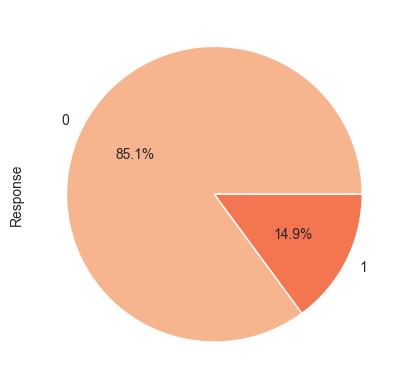

In [17]:
sns.set_palette('rocket_r')
df['Response'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**Note**: The **target** classes are **imbalanced**.

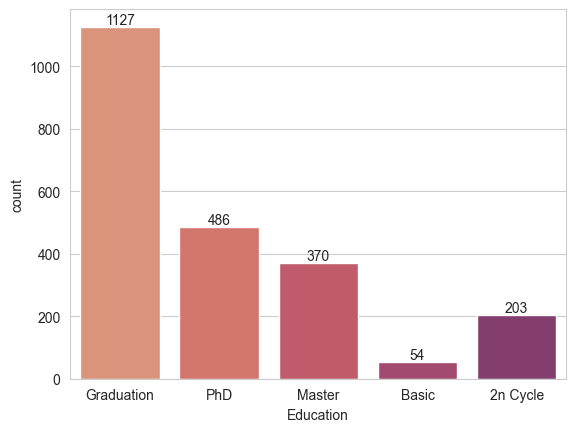

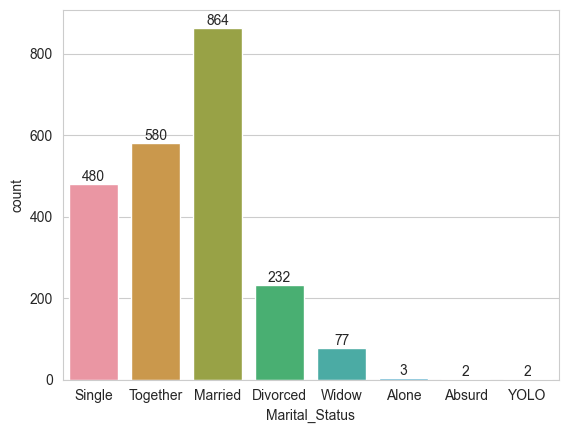

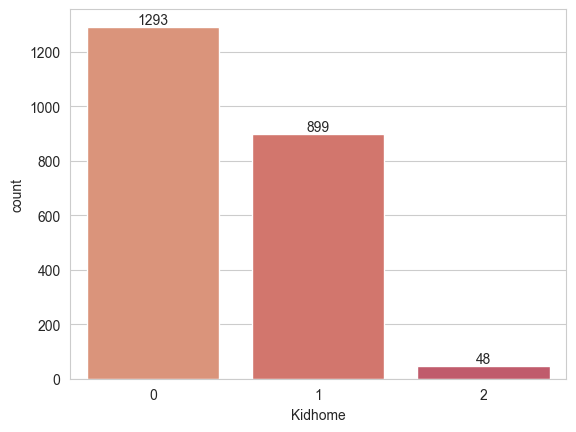

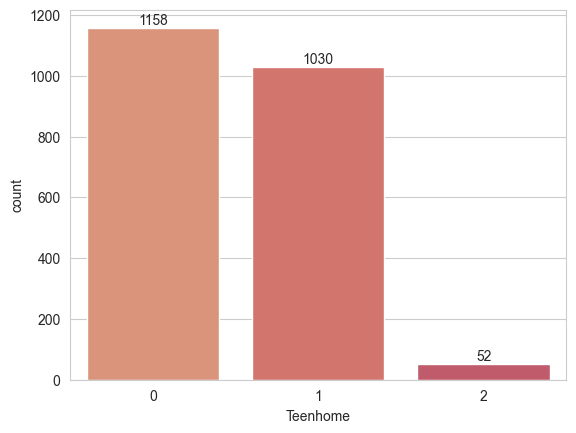

In [18]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

**Note**: The categorical columns are **imbalanced**.

**To try**: The 'Alone' values of the _Marital_Status_ could be changed to 'Single', and the 'Absurd' and 'YOLO' columns can be combined in 'Other'.

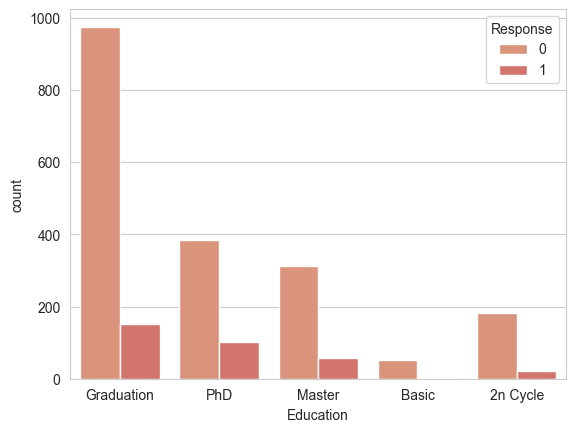

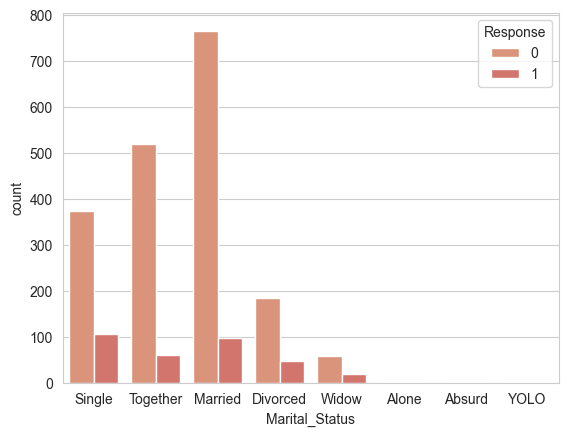

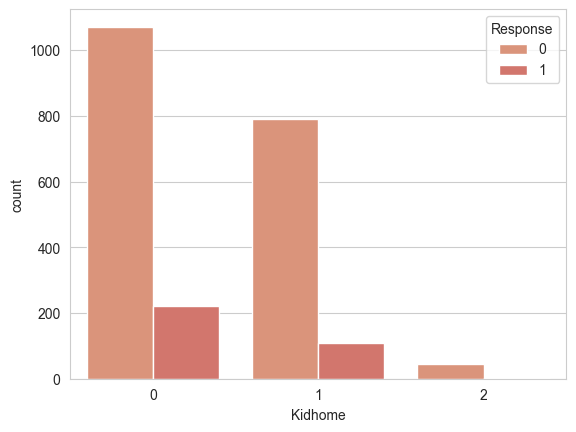

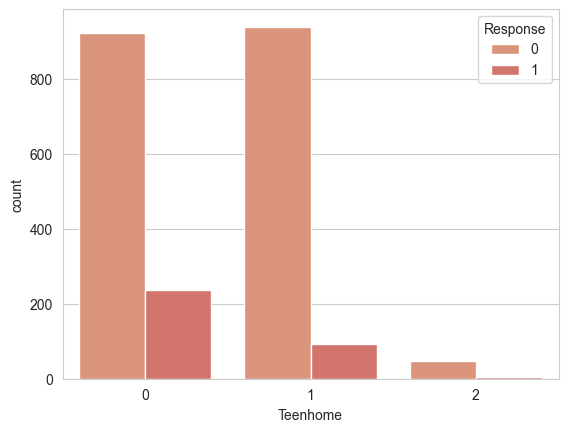

In [19]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column, hue='Response')
    plt.show()

**Note**: **Single** people with **no children** at home seem to be more likely to respond.

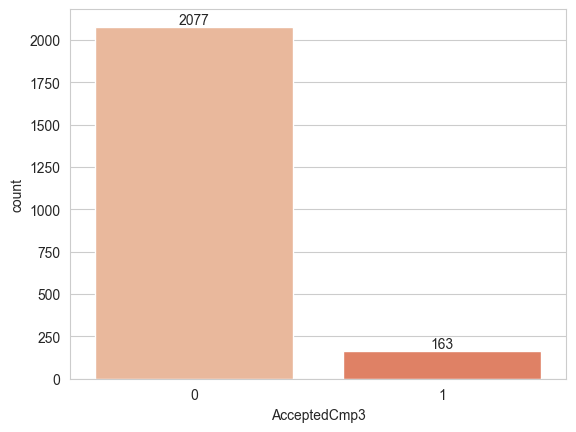

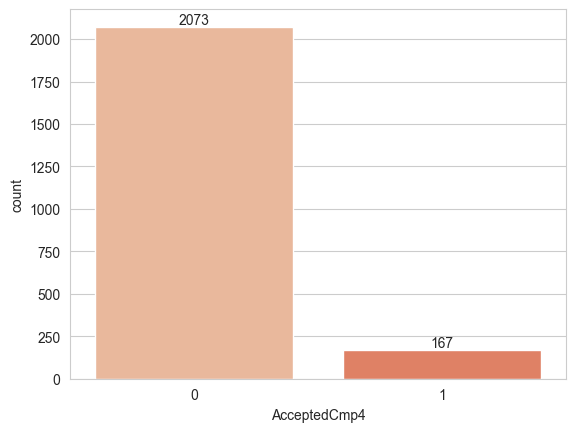

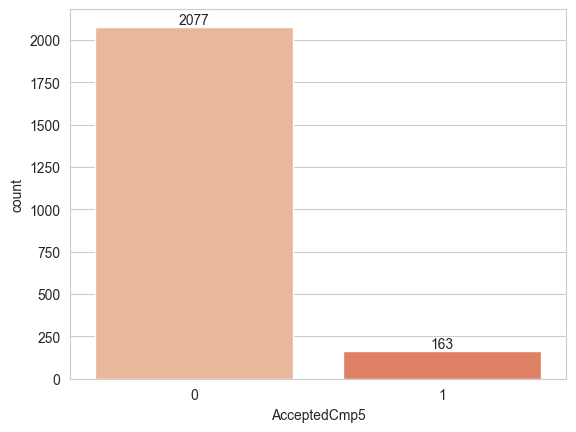

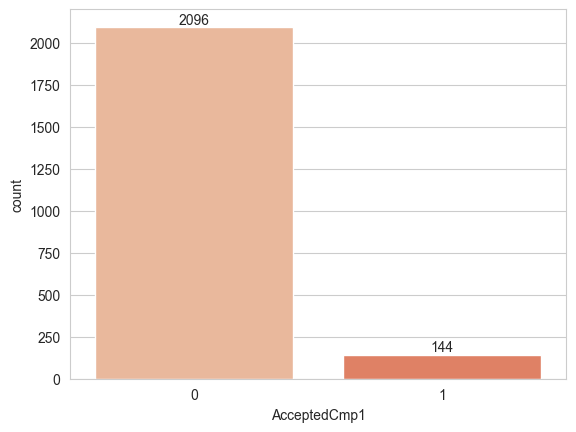

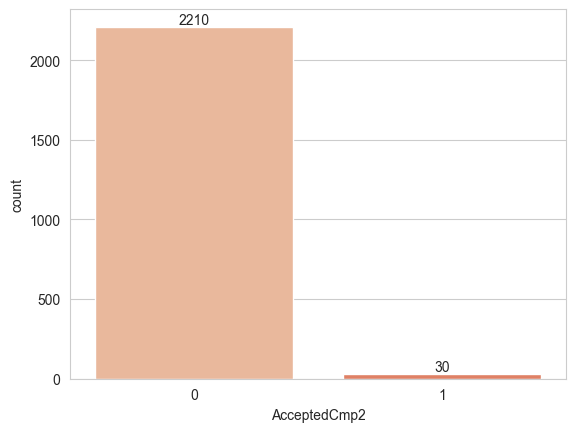

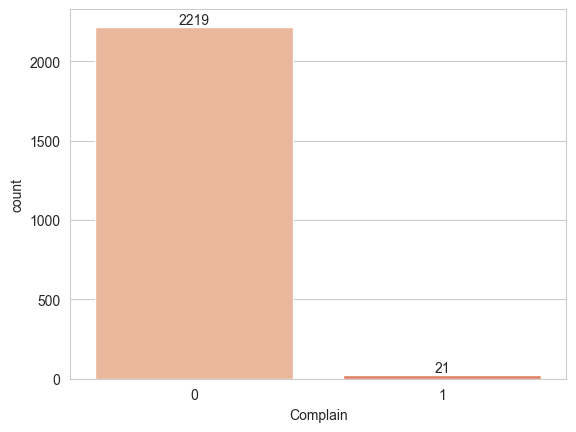

In [20]:
for column in binary_columns:
    sns.set_palette('rocket_r')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

**Note**: The binary columns are also **imbalanced**.

Check the **correlation** between the binary columns and the target.

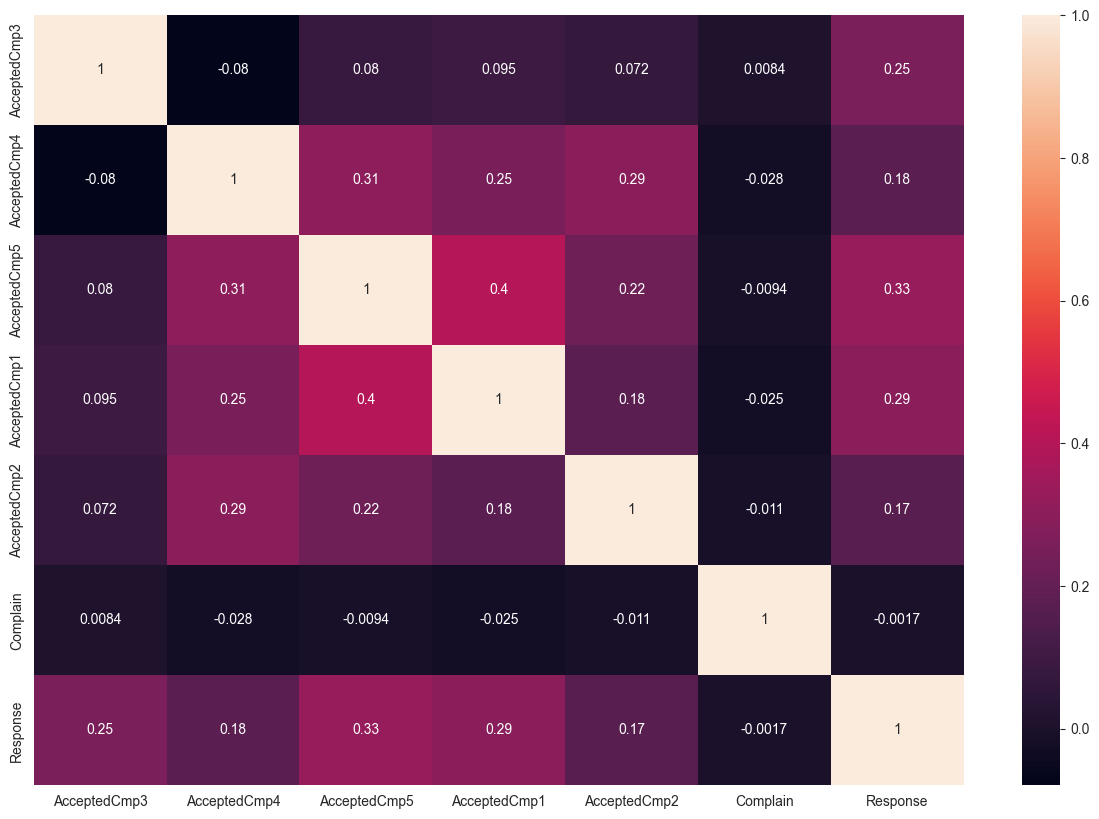

In [21]:
temp_df = pd.DataFrame(df[np.concatenate((binary_columns, ['Response']), axis=0)])
plt.figure(figsize=(15, 10))
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

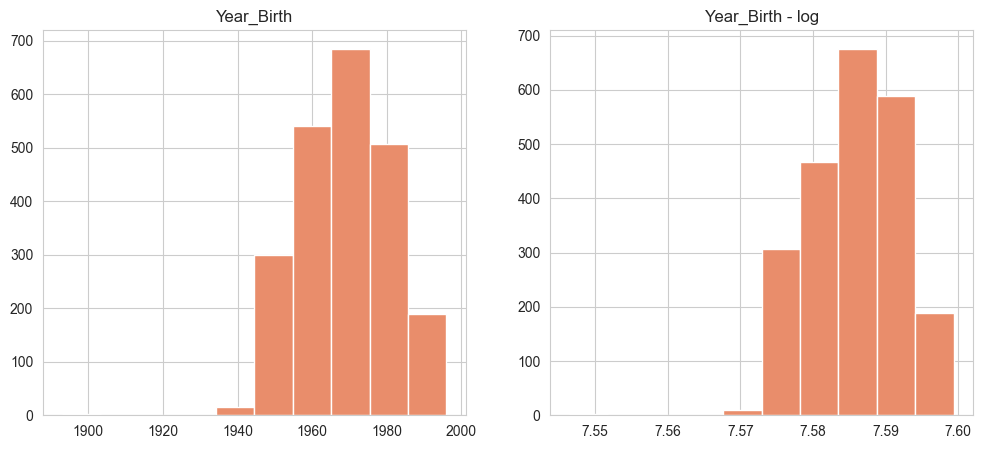

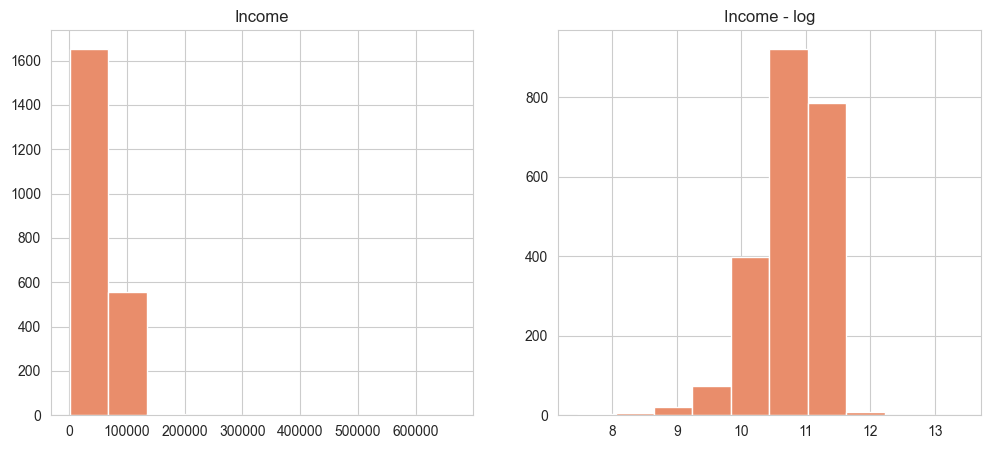

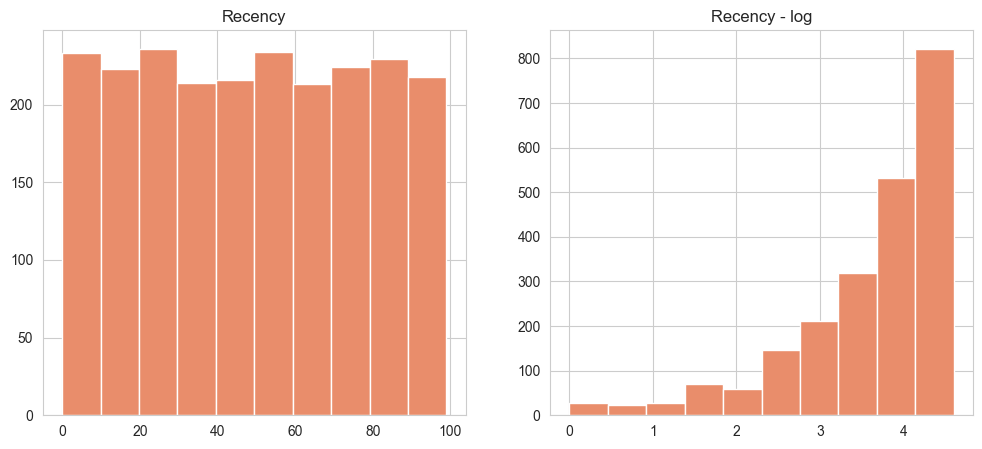

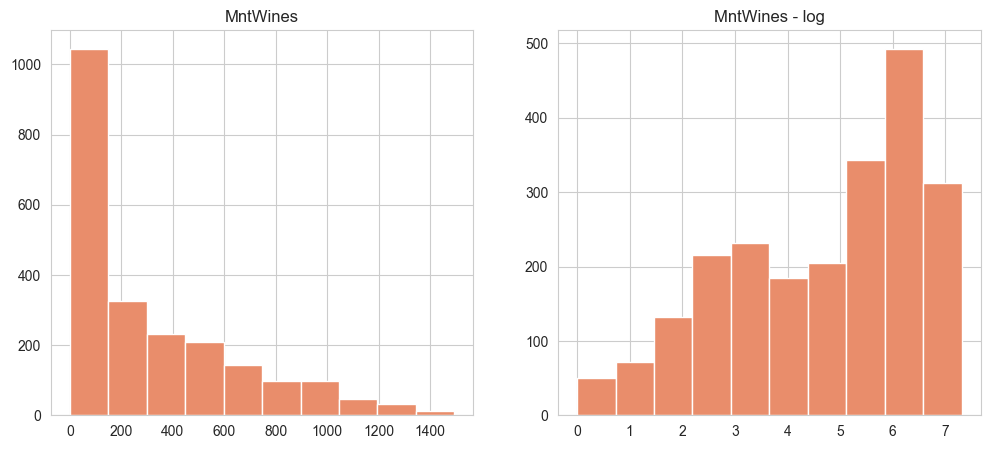

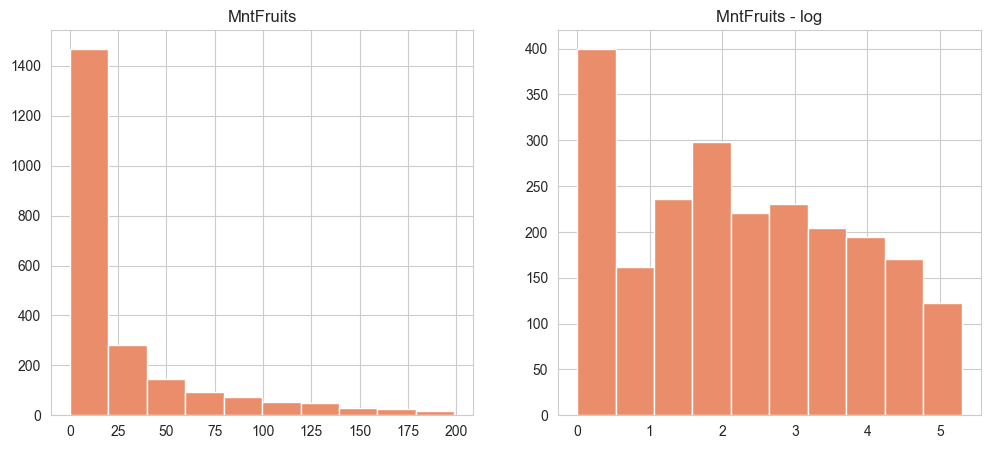

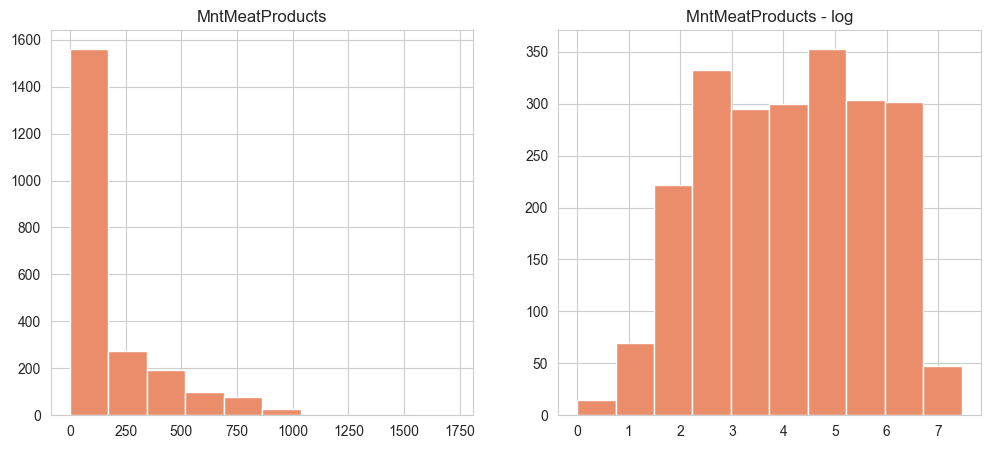

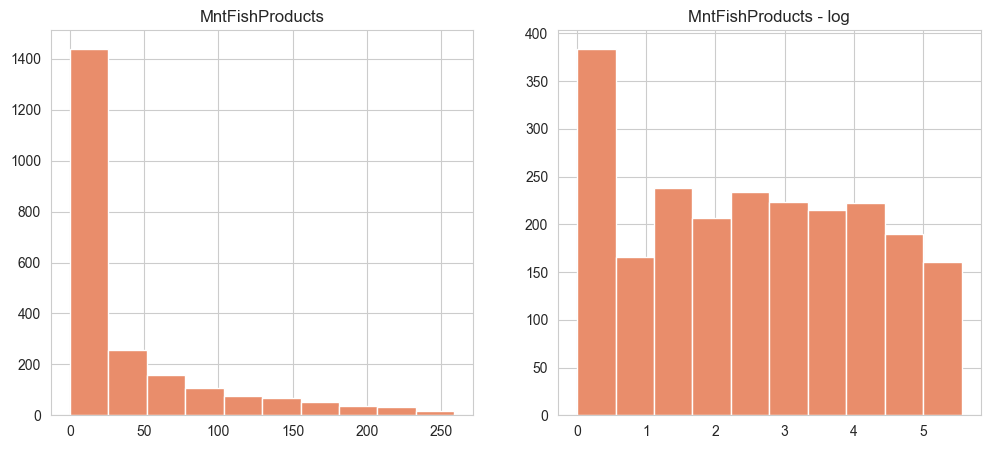

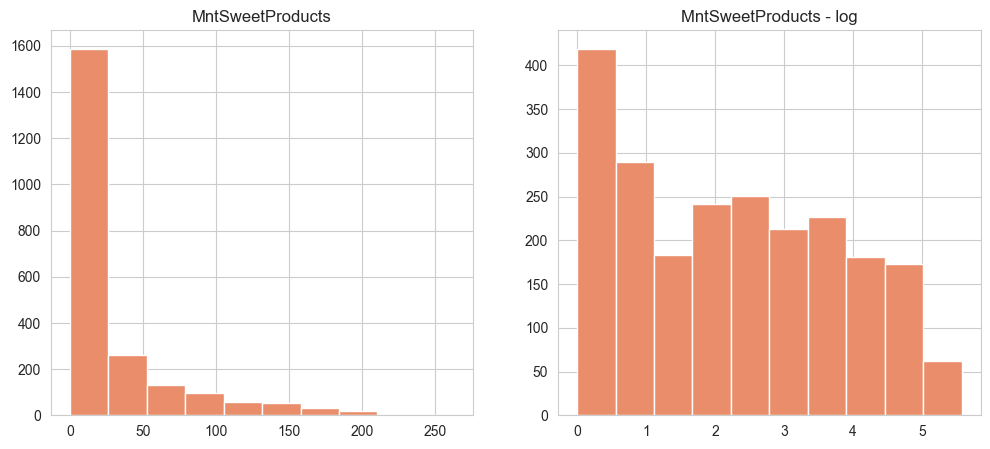

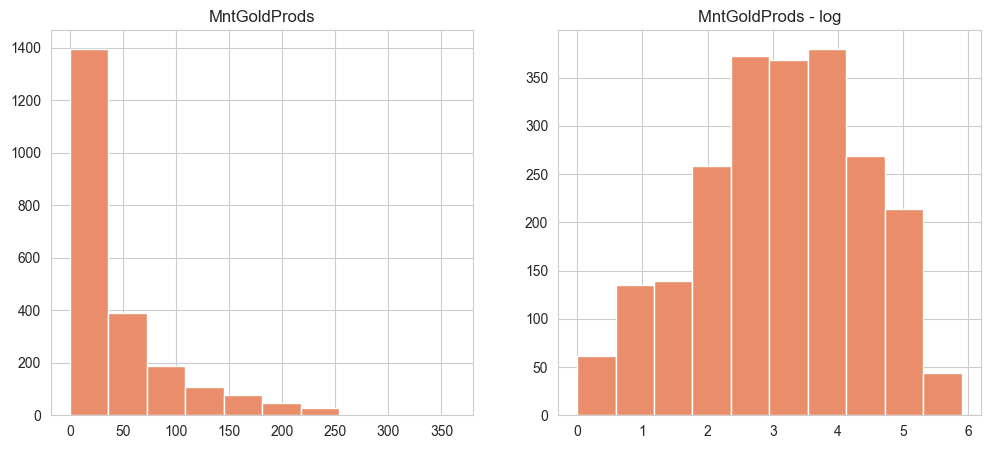

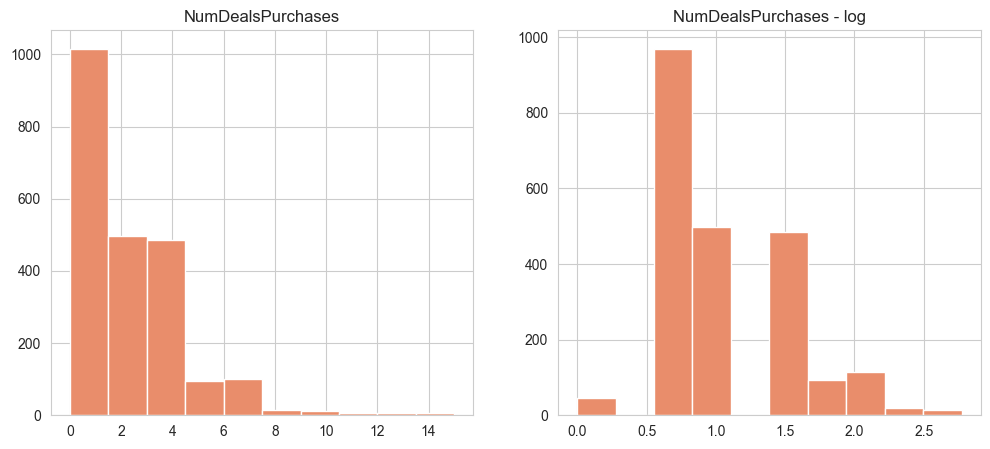

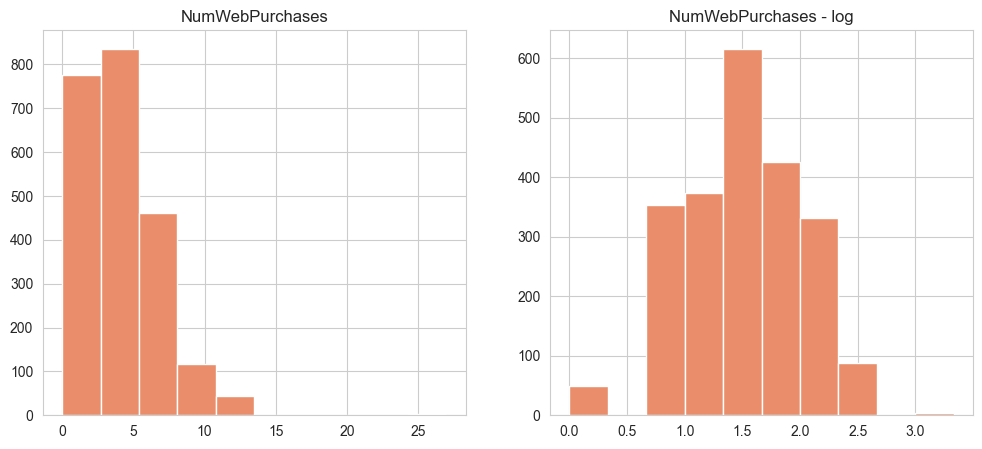

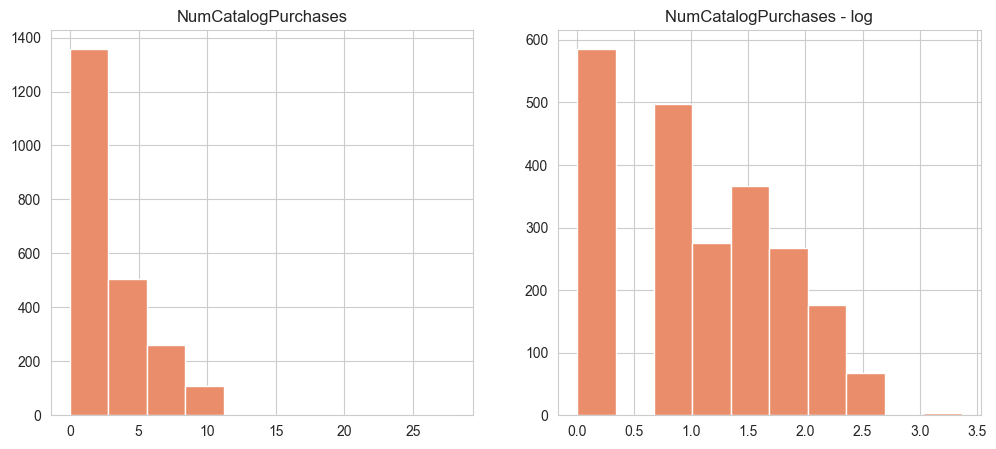

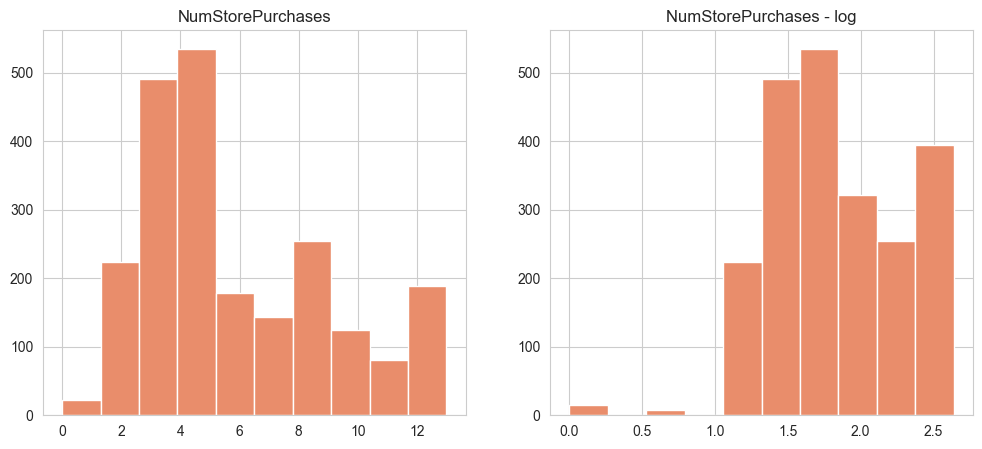

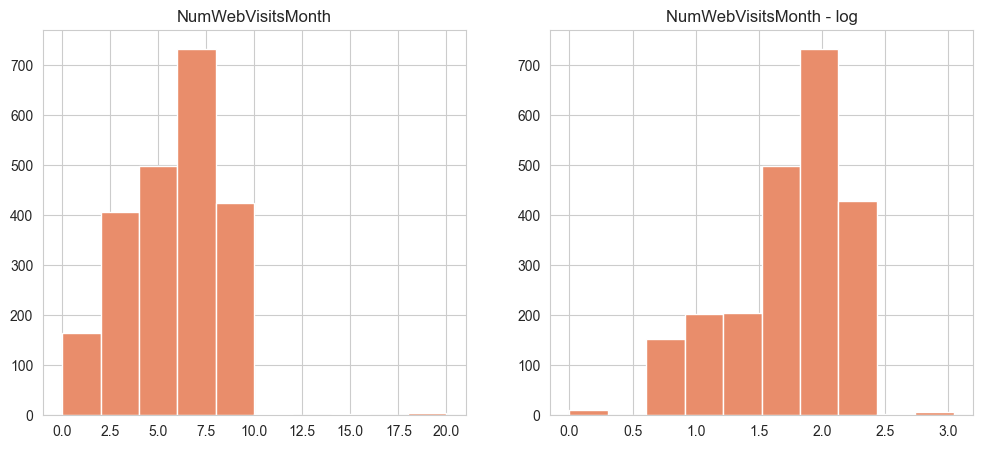

In [22]:
for col in numeric_columns:
    sns.set_palette('flare')
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax.flat[0].hist(df[col])
    ax.flat[0].set_title(f'{col}')
    ax.flat[1].hist(np.log1p(df[col]))
    ax.flat[1].set_title(f'{col} - log')
    plt.show()

**To try**: Applying **log** on most numeric columns could be helpful.

Checking the **correlation** between the numerical columns and the target.

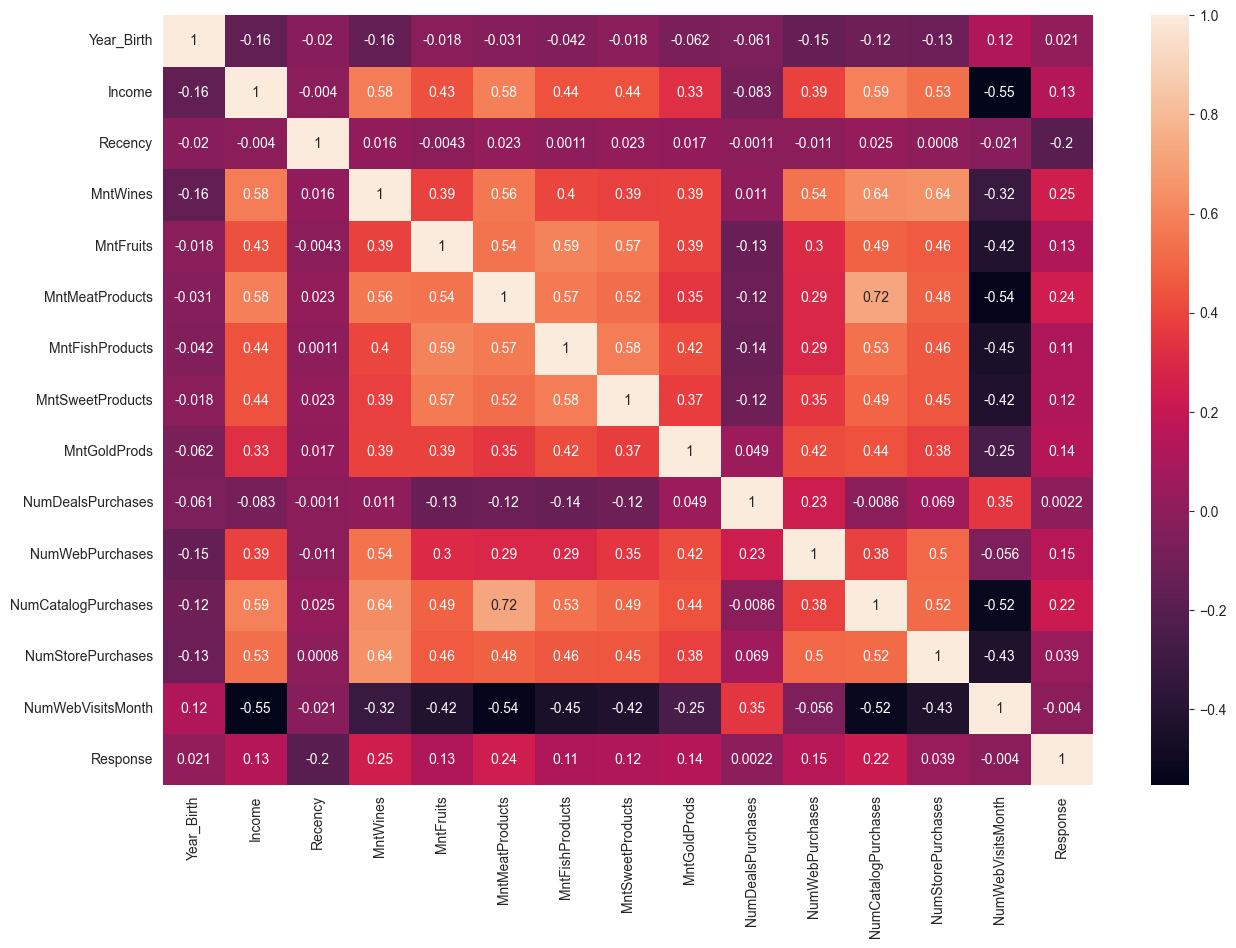

In [23]:
temp_df = pd.DataFrame(df[np.concatenate((numeric_columns, ['Response']), axis=0)])
plt.figure(figsize=(15, 10))
sns.set_palette('icefire')
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

**Note**: There is a **negative correlation** between _Recency_ and _Response_, so the more days have passed since the customer's last purchase, the less likely they are to respond.

<AxesSubplot: xlabel='Response', ylabel='Recency'>

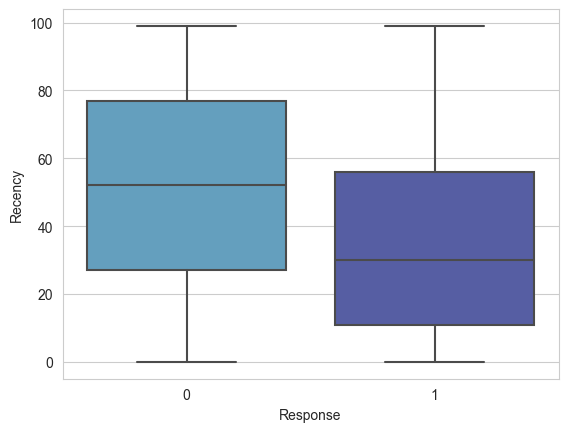

In [24]:
sns.boxplot(data=df, x='Response', y='Recency')

# Model Training

## Baseline

**Goal**: Create baseline models and check how each performs on the dataset.

### Preprocessing

In [25]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # drop columns
    df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

    # fill the missing values in Income with mode
    df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

    # replace Marital_Status values
    df = df.replace('Alone','Single') # replace 'Alone' with 'Single'
    df = df.replace('YOLO', 'Other') # replace 'YOLO' with 'Other'
    df = df.replace('Absurd','Other') # replace 'Absurd' with 'Other'

    # log some numerical columns
    log_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # one hot encode columns
    one_hot_columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['Response'], axis=1)
    y = result['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

### Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.8909438775510204
Test score:  0.8988095238095238


<AxesSubplot: >

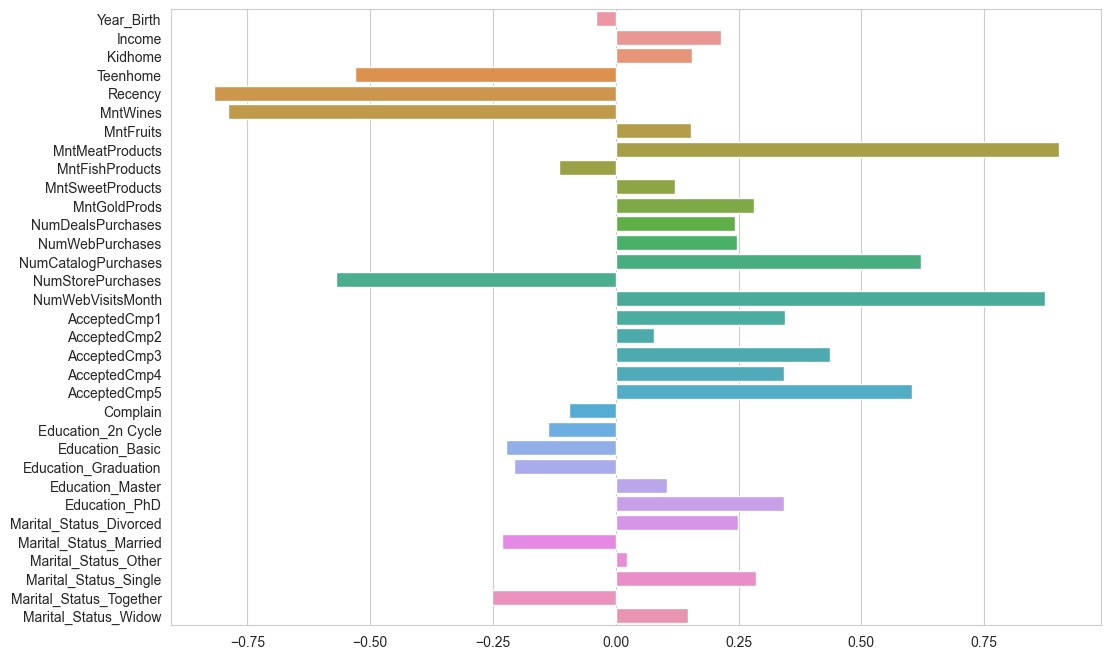

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

In [29]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       589
           1       0.62      0.48      0.54        83

    accuracy                           0.90       672
   macro avg       0.77      0.72      0.74       672
weighted avg       0.89      0.90      0.89       672



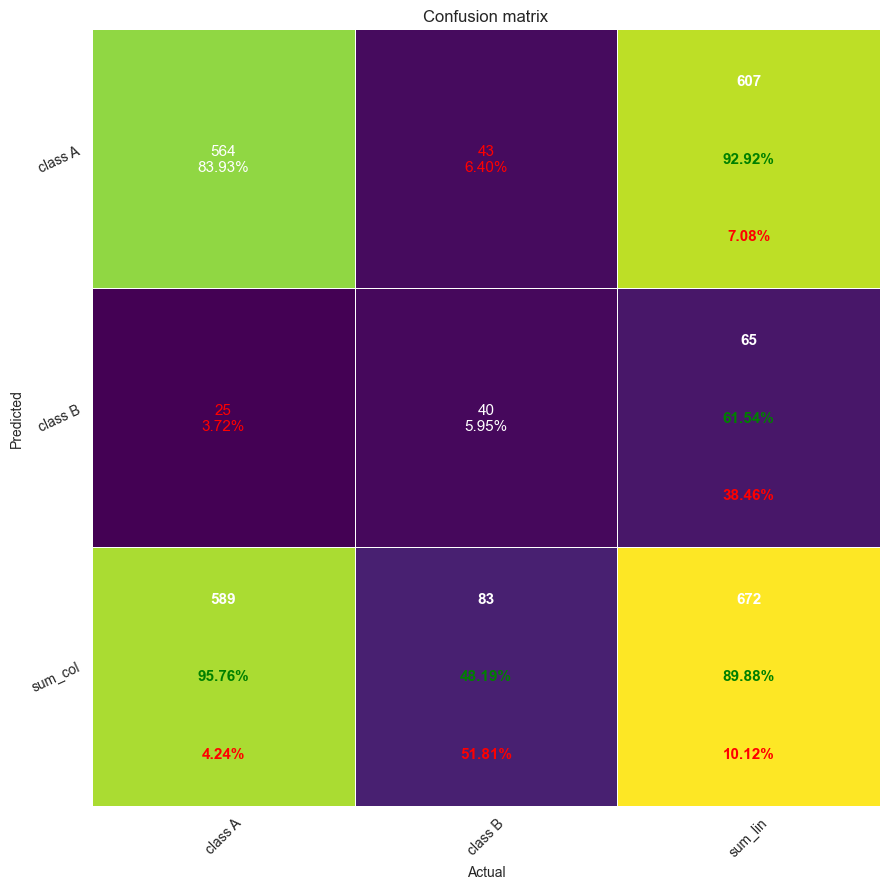

In [30]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion:** Logistic Regression has **low Recall** score on class 1 but high **Accuracy** because of the class imbalance.

### K-Nearest Neighbours

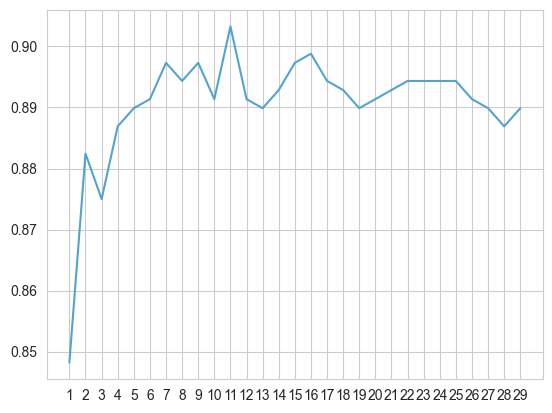

Best N value: 11


In [31]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train, y_train)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [32]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       589
           1       0.78      0.30      0.43        83

    accuracy                           0.90       672
   macro avg       0.85      0.64      0.69       672
weighted avg       0.89      0.90      0.88       672



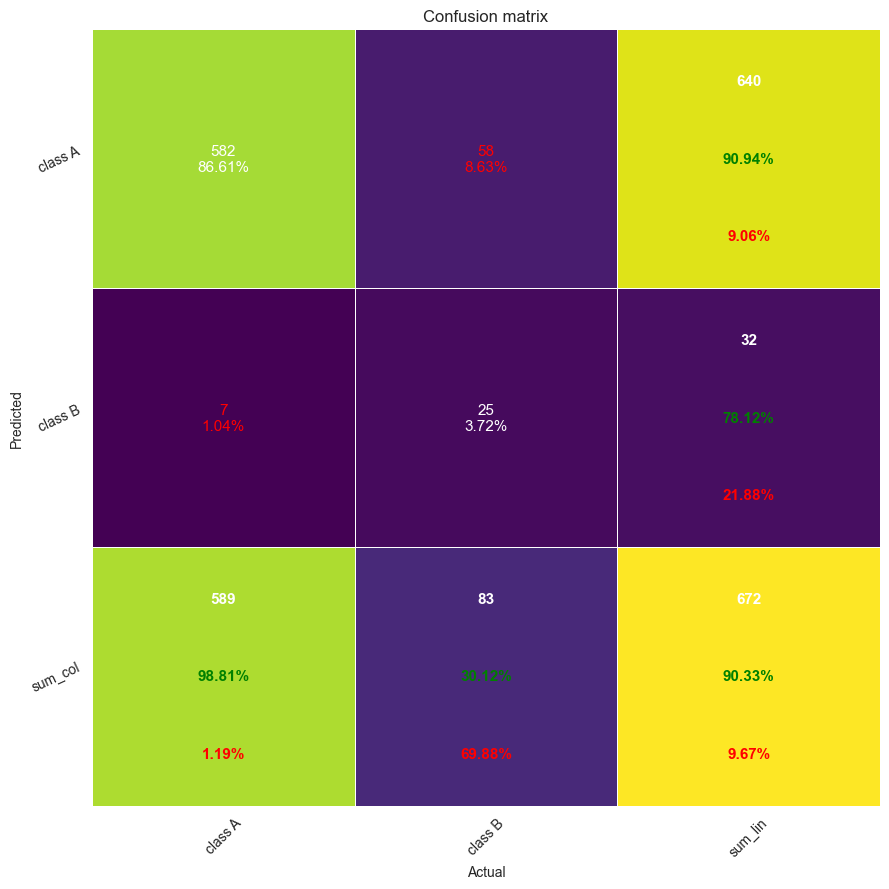

In [33]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: KNN performs similarly to Logistic Regression on class 0, but worse on **Recall** for class 1.

### Decision Tree

In [34]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [35]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

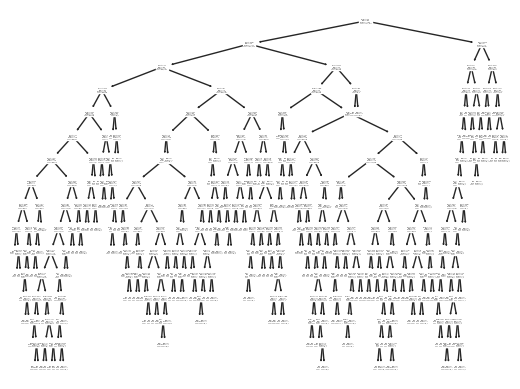

In [36]:
plot_tree(model)
plt.show()

In [37]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       589
           1       0.40      0.53      0.46        83

    accuracy                           0.84       672
   macro avg       0.67      0.71      0.68       672
weighted avg       0.87      0.84      0.85       672



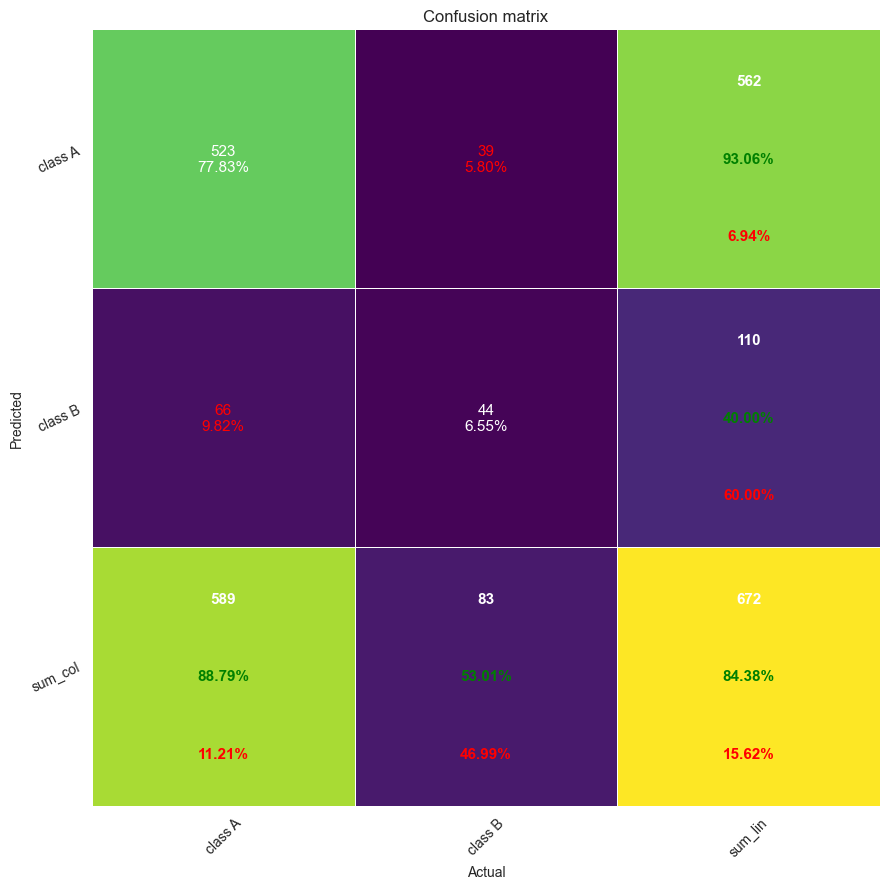

In [38]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Decision Tree has **lower Recall** score on class 0, but **higher Recall** on class 1.

The **Precision** score (0.4) for class 1 is significantly lower than the ones of Logistic Regression (0.62) and KNN (0.78).

### Random Forest

In [39]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [40]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       589
           1       0.58      0.51      0.54        83

    accuracy                           0.89       672
   macro avg       0.76      0.73      0.74       672
weighted avg       0.89      0.89      0.89       672



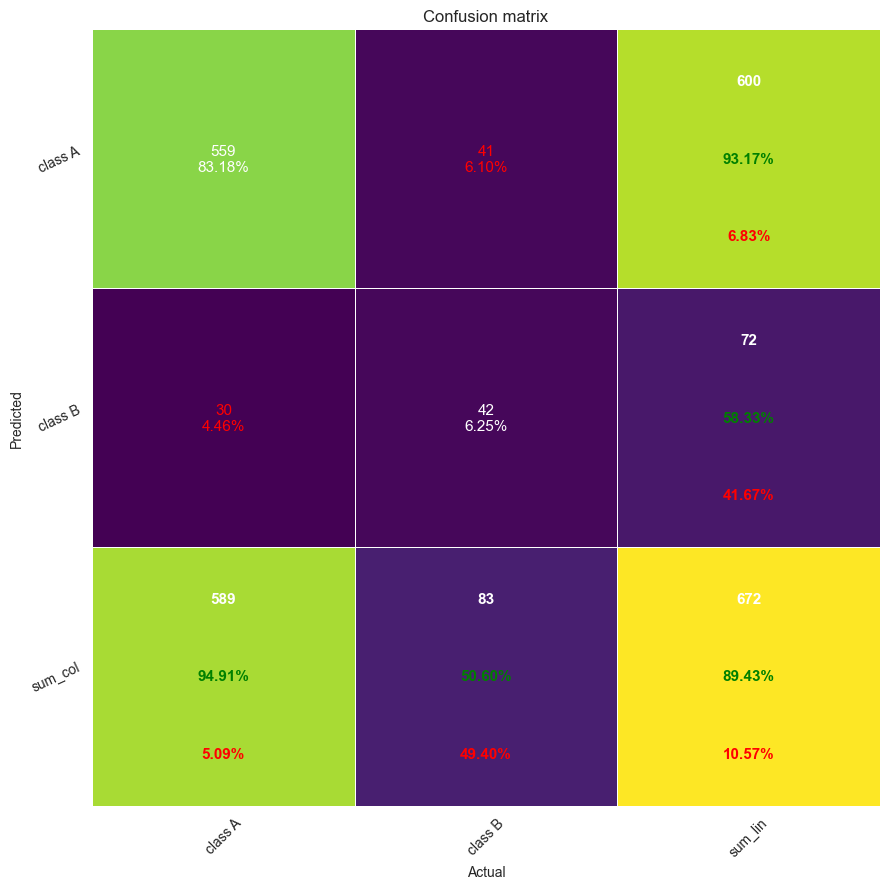

In [42]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

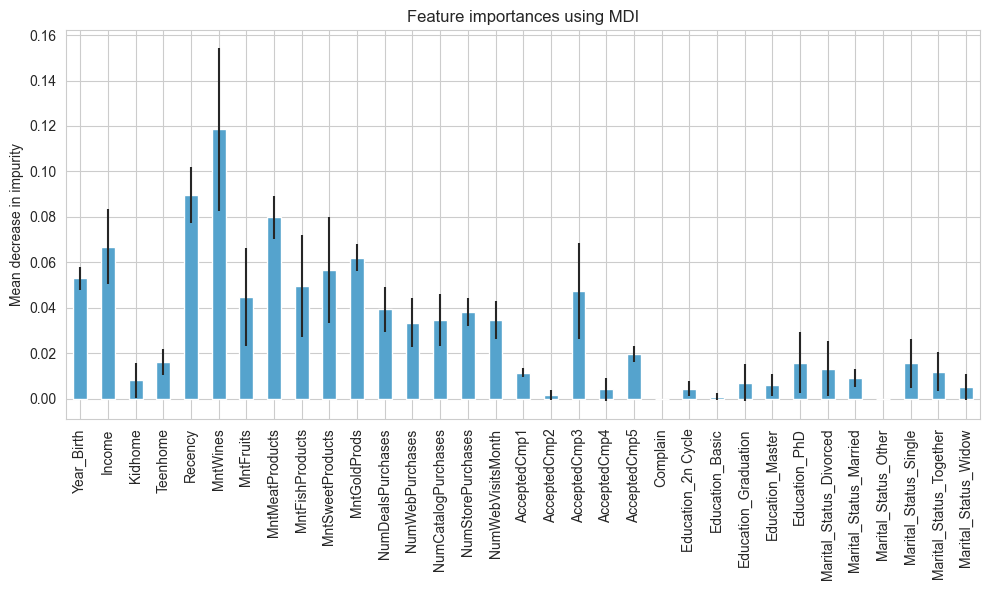

In [43]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: Random Forest performs better than Decision Tree for **Recall** on class 1, but with higher **Precision**.

### Support Vector Classifier

**Note**: Using **Balanced Accuracy** produced better results than just Recall, so I am using it as scoring for SVC.

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train, y_train)

In [45]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       589
           1       0.46      0.51      0.48        83

    accuracy                           0.86       672
   macro avg       0.69      0.71      0.70       672
weighted avg       0.87      0.86      0.87       672



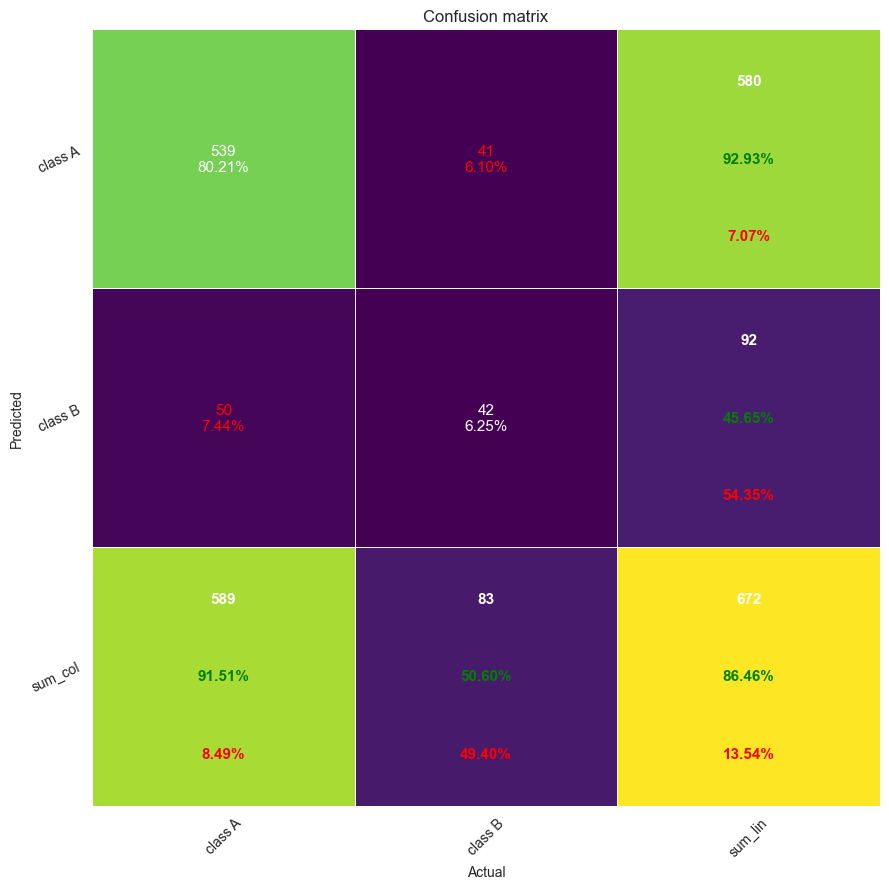

In [46]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: SVC performs similarly to Random Forest, but has lower **Precision** for class 1.

**Conclusion - baseline training**: Because of the imbalanced target column, models tend to perform worse on class 1.

## Add date of enrollment feature

**Goal**: Testing the same models, but the previously dropped date column is transformed into an integer, representing the month of customer enrollment in the company.

### Preprocessing

In [47]:
# encode date
def transform_date(entry):
    l = list(map(int, entry.split('-')[1:]))
    return l[0] + (l[1] % 100) * 12

In [49]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # drop columns
    df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

    # encode date
    df['Dt_Customer'] = [transform_date(df.iloc[index]['Dt_Customer']) for index in range(df.shape[0])]

    # fill the missing values in Income with mode
    df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

    # replace Marital_Status values
    df = df.replace('Alone','Single') # replace 'Alone' with 'Single'
    df = df.replace('YOLO', 'Other') # replace 'YOLO' with 'Other'
    df = df.replace('Absurd','Other') # replace 'Absurd' with 'Other'

    # log some numerical columns
    log_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # one hot encode columns
    one_hot_columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['Response'], axis=1)
    y = result['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [50]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.8992346938775511
Test score:  0.8973214285714286


<AxesSubplot: >

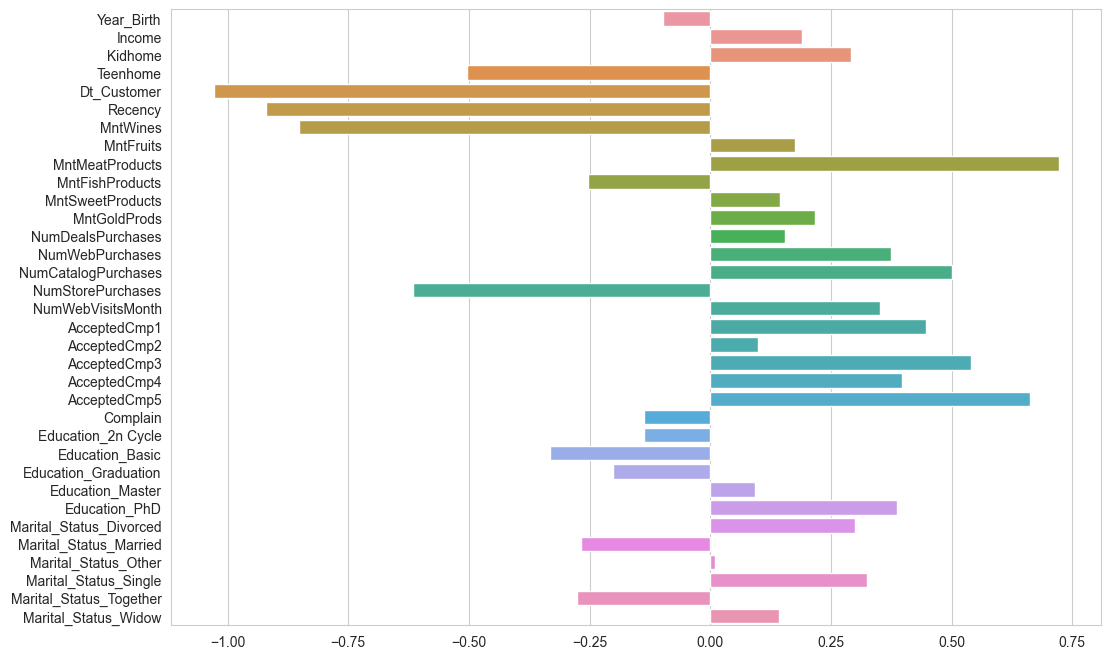

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

In [53]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       589
           1       0.60      0.52      0.55        83

    accuracy                           0.90       672
   macro avg       0.77      0.73      0.75       672
weighted avg       0.89      0.90      0.89       672



In [ ]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Adding the extra feature slightly improved class 1 **Recall**.

### K-Nearest Neighbours

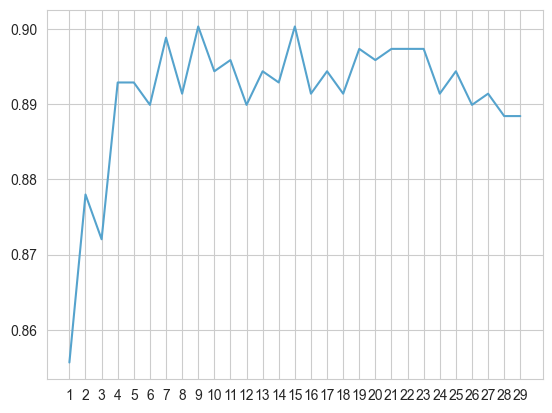

Best N value: 9


In [54]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train, y_train)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [55]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       589
           1       0.72      0.31      0.44        83

    accuracy                           0.90       672
   macro avg       0.82      0.65      0.69       672
weighted avg       0.89      0.90      0.88       672



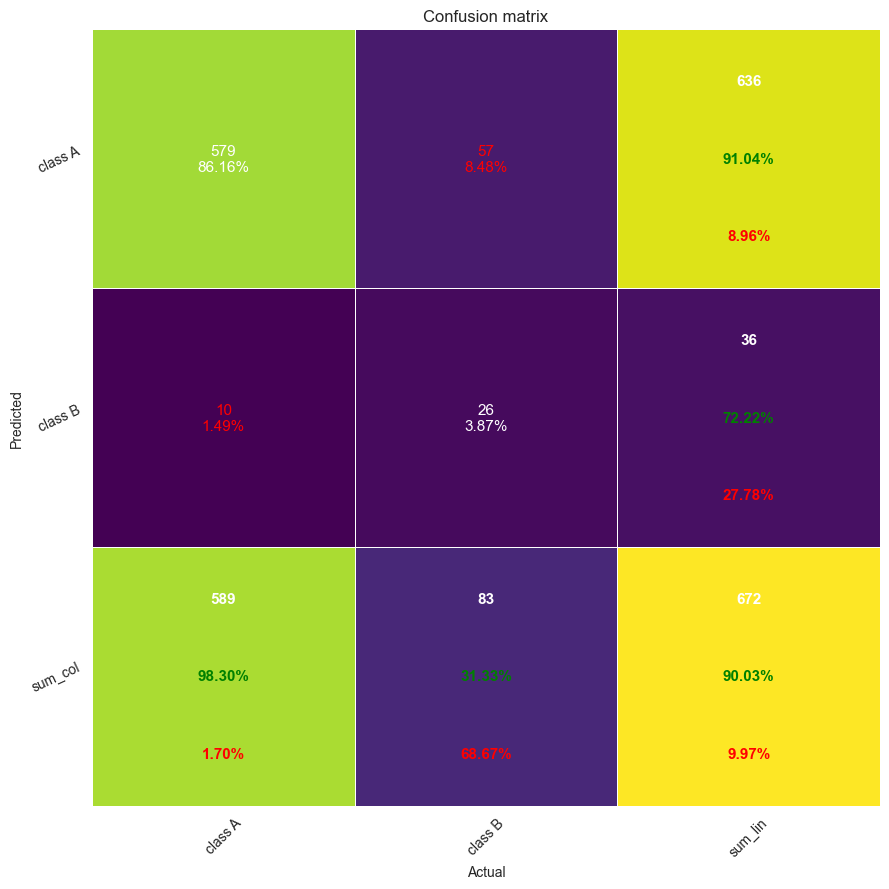

In [56]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: No improvement for KNN.

### Decision Tree

In [57]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [58]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

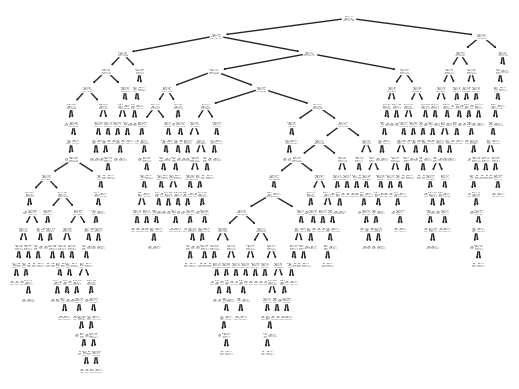

In [59]:
plot_tree(model)
plt.show()

In [60]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       589
           1       0.40      0.58      0.47        83

    accuracy                           0.84       672
   macro avg       0.67      0.73      0.69       672
weighted avg       0.87      0.84      0.85       672



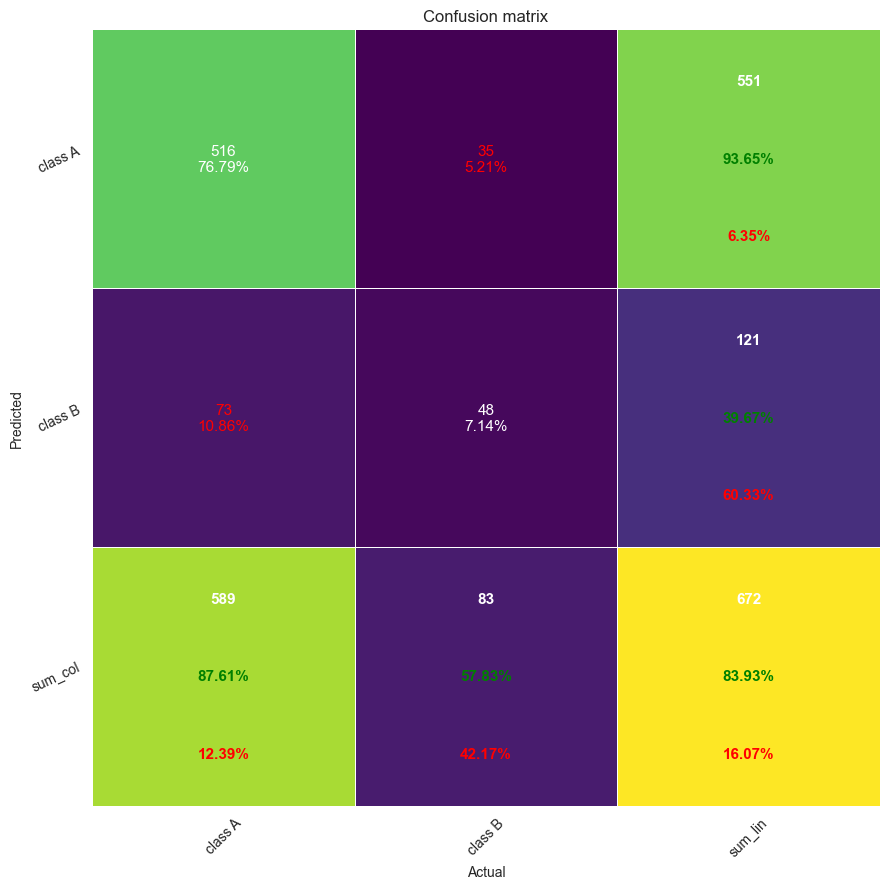

In [61]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Slight improvement in **Recall** from class 1.

### Random Forest

In [62]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [63]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       589
           1       0.66      0.42      0.51        83

    accuracy                           0.90       672
   macro avg       0.79      0.70      0.73       672
weighted avg       0.89      0.90      0.89       672



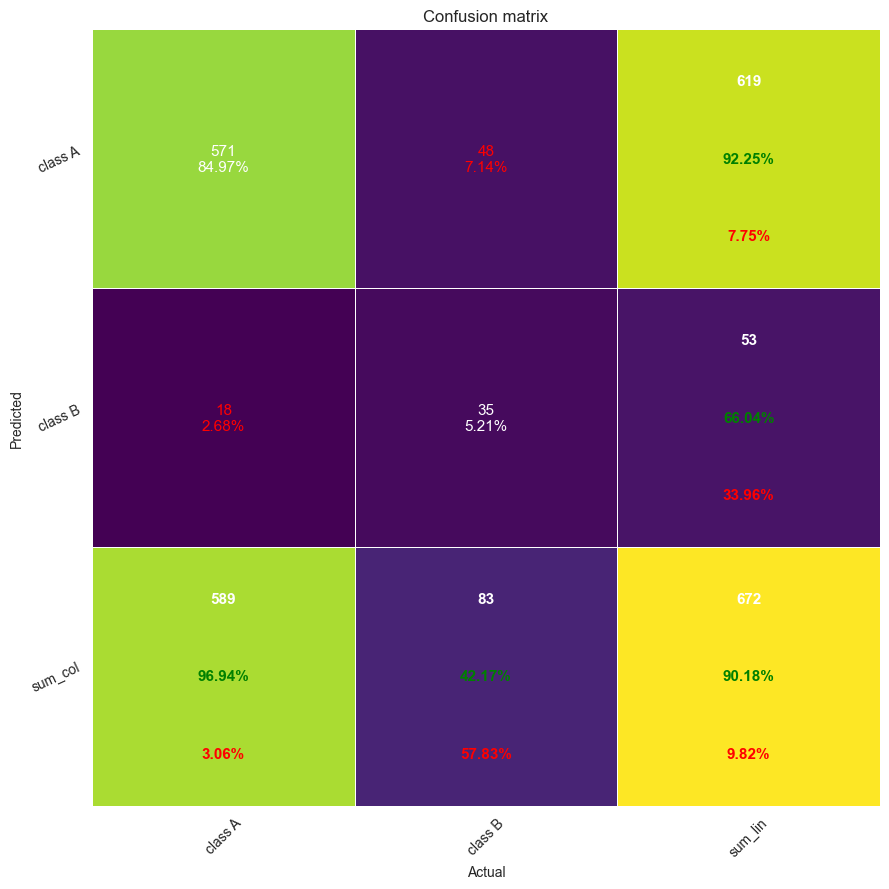

In [65]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

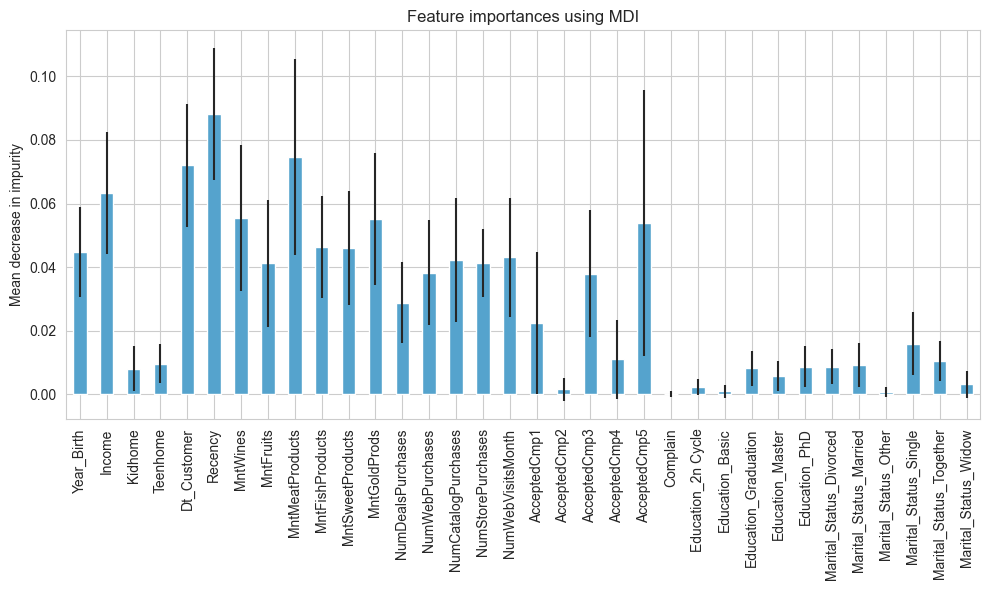

In [66]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: Improvement in **Precision** score, but decrease in **Recall**.

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train, y_train)

In [68]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       589
           1       0.48      0.59      0.53        83

    accuracy                           0.87       672
   macro avg       0.71      0.75      0.73       672
weighted avg       0.88      0.87      0.88       672



In [ ]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: **Recall** from class 1 improved.

**Conclusion - second training**: The overall model performance slightly improved.

## Group and encode education

**Goal**: Group the education values into non-graduate and graduate level.

### Preprocessing

In [69]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # drop columns
    df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

    # encode date
    df['Dt_Customer'] = [transform_date(df.iloc[index]['Dt_Customer']) for index in range(df.shape[0])]

    # fill the missing values in Income with mode
    df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

    # replace Marital_Status values
    df = df.replace('Alone','Single') # replace 'Alone' with 'Single'
    df = df.replace('YOLO', 'Other') # replace 'YOLO' with 'Other'
    df = df.replace('Absurd','Other') # replace 'Absurd' with 'Other'

    # log some numerical columns
    log_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # transform education
    df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 1)
    df['Education'] = df['Education'].replace(['Basic'], 0)

    # one hot encode columns
    one_hot_columns = ['Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['Response'], axis=1)
    y = result['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [70]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

### Logistic Regression

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.8973214285714286
Test score:  0.8913690476190477


<AxesSubplot: >

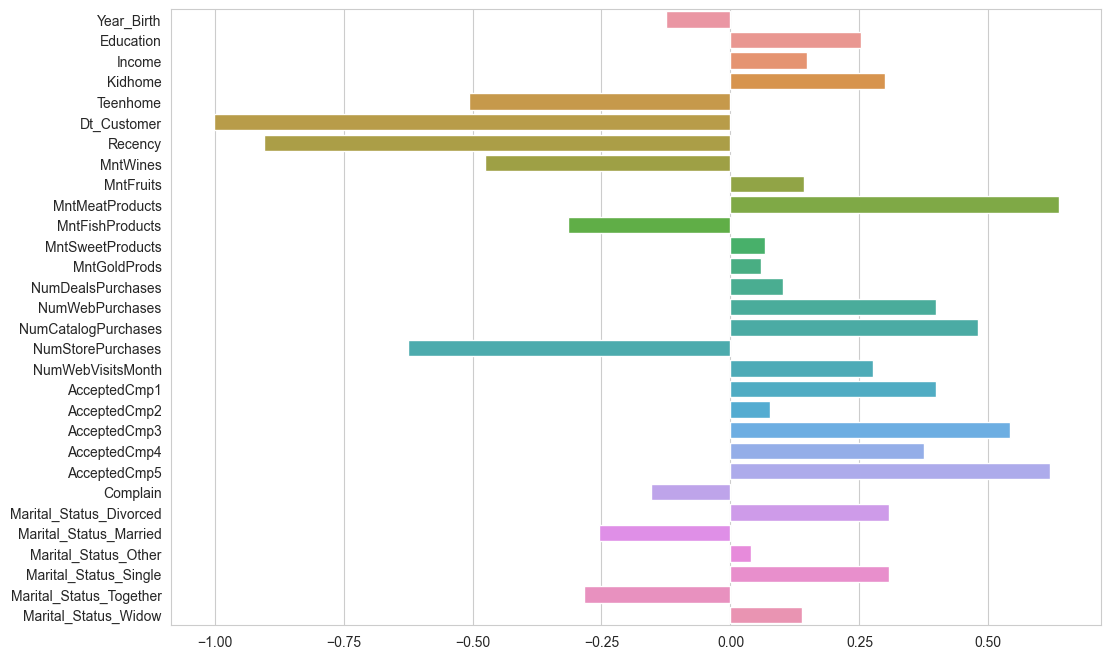

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

In [73]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       589
           1       0.57      0.49      0.53        83

    accuracy                           0.89       672
   macro avg       0.75      0.72      0.73       672
weighted avg       0.89      0.89      0.89       672



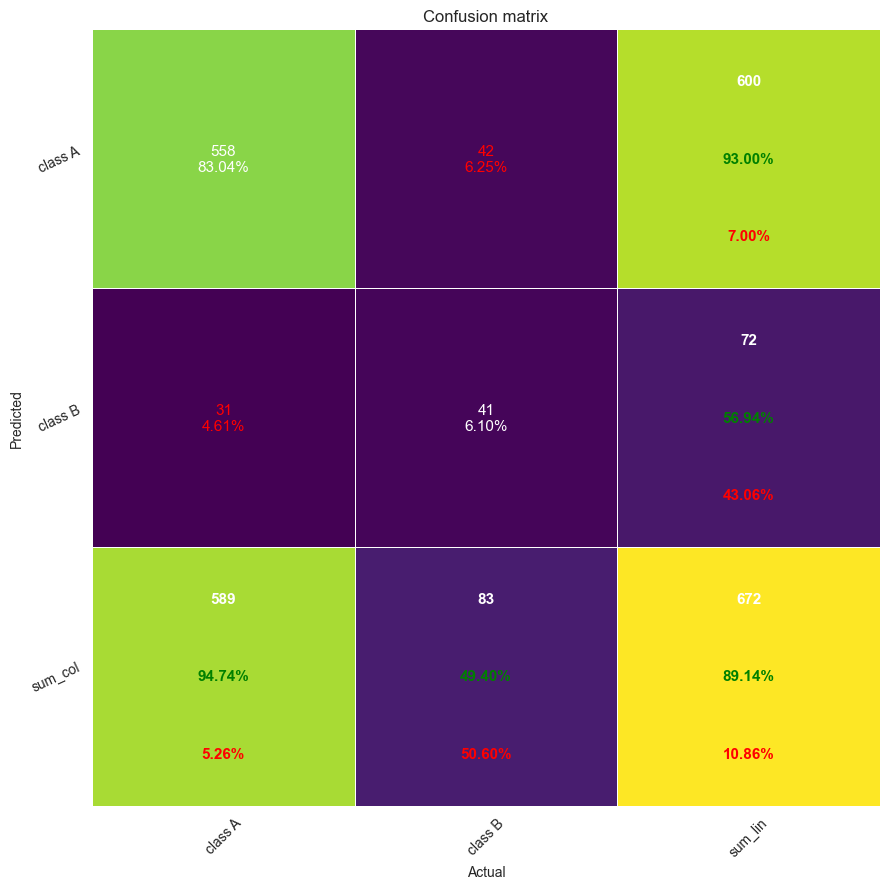

In [74]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Decrease in performance for class 1.

### KNN

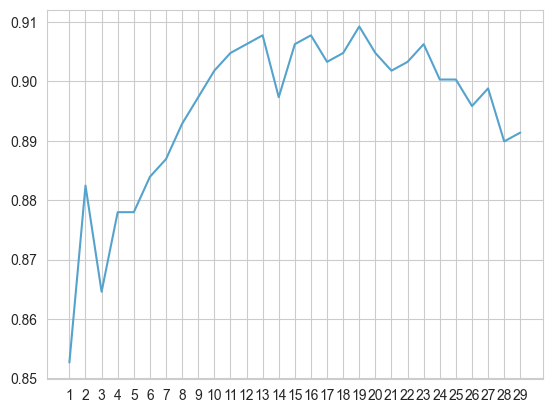

Best N value: 19


In [75]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train, y_train)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [76]:
print('Best N value: ' + str(model.get_params()['n_neighbors']))
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

Best N value: 19
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       589
           1       0.79      0.36      0.50        83

    accuracy                           0.91       672
   macro avg       0.85      0.67      0.72       672
weighted avg       0.90      0.91      0.89       672



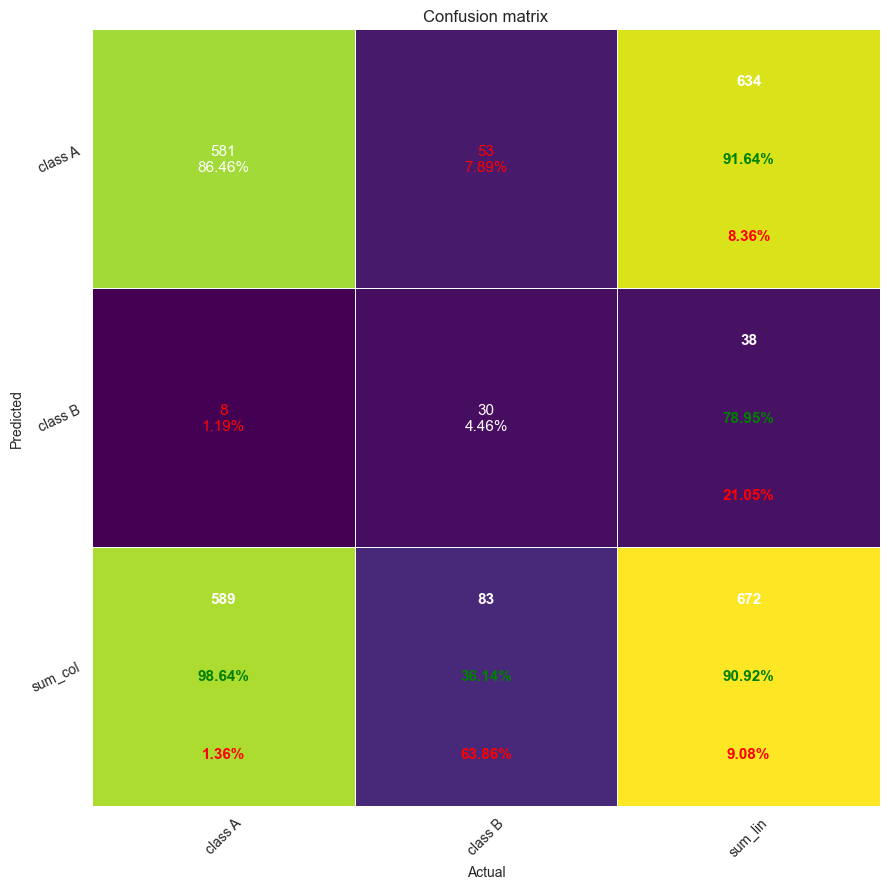

In [77]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Improvement for class 1.

### Decision Tree

In [78]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [79]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

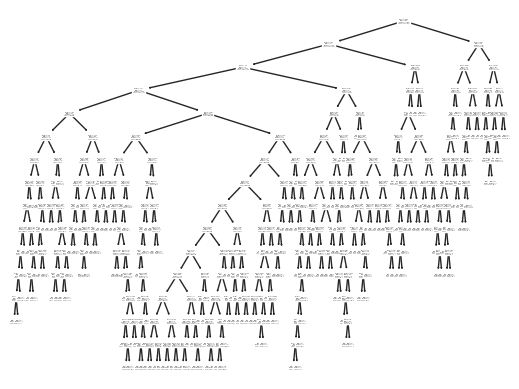

In [80]:
plot_tree(model)
plt.show()

In [81]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       589
           1       0.48      0.46      0.47        83

    accuracy                           0.87       672
   macro avg       0.70      0.69      0.70       672
weighted avg       0.87      0.87      0.87       672



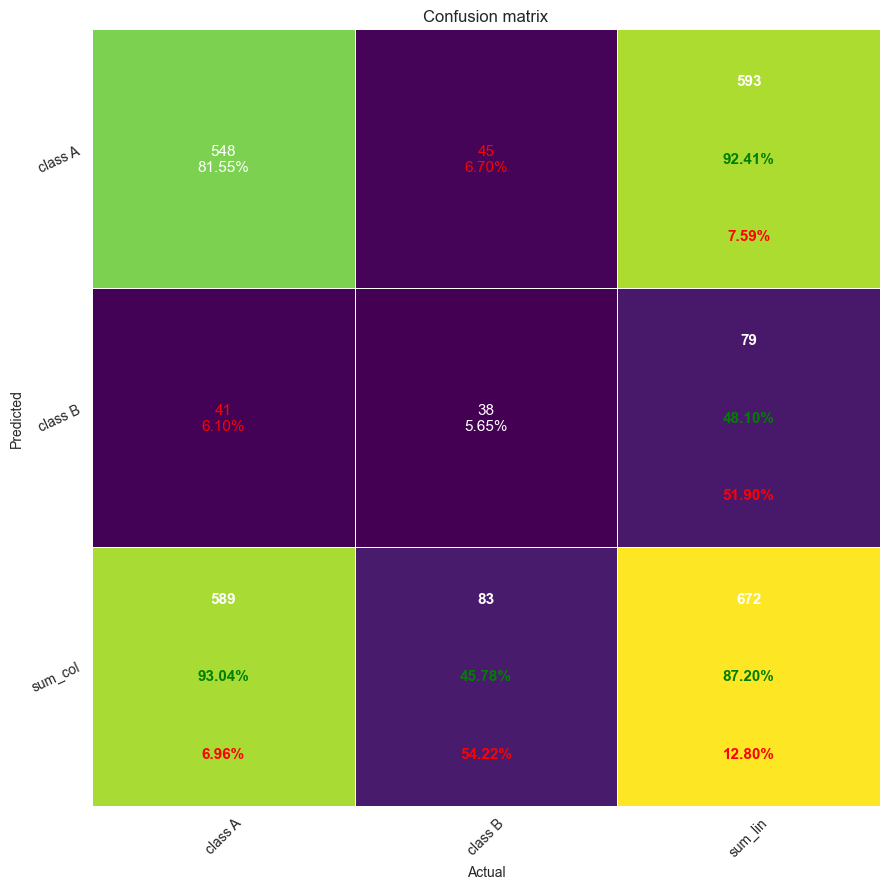

In [82]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Increase in **Recall** score for class 0 and **Precision** for class 1, but decrease in **Recall** for class 1.

### Random Forest

In [83]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [84]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [85]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       589
           1       0.58      0.47      0.52        83

    accuracy                           0.89       672
   macro avg       0.75      0.71      0.73       672
weighted avg       0.88      0.89      0.89       672



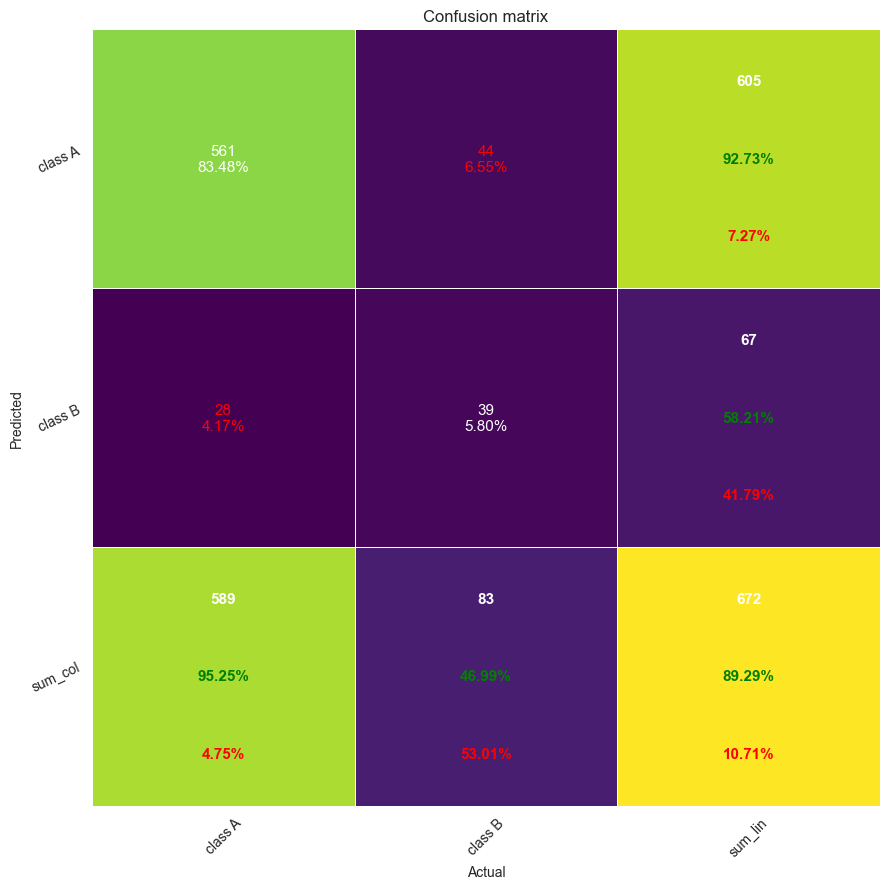

In [86]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

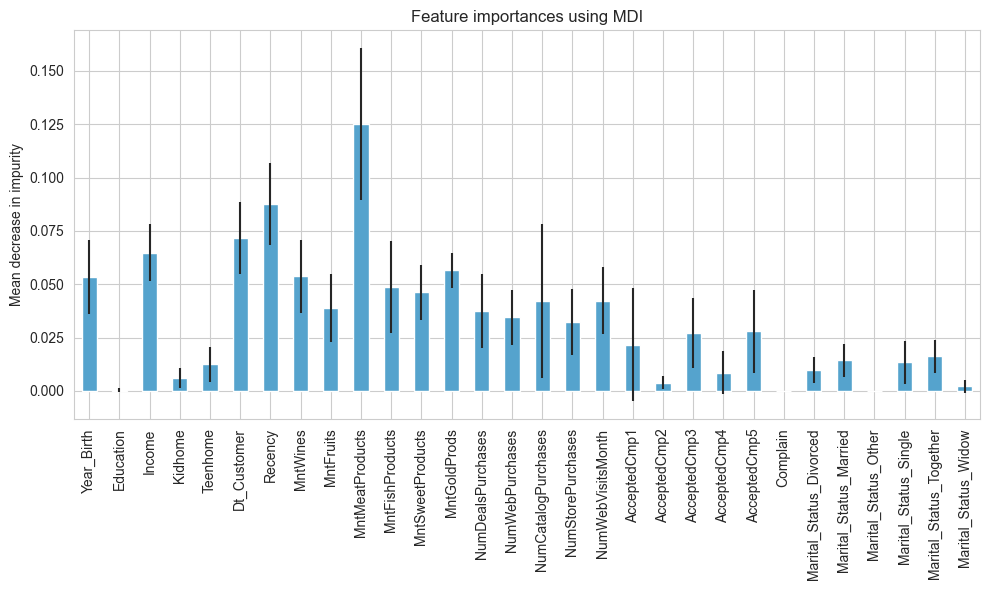

In [87]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: Increase in **Recall** and decrease in **Precision** for class 1.

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train, y_train)

In [89]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       589
           1       0.51      0.52      0.51        83

    accuracy                           0.88       672
   macro avg       0.72      0.72      0.72       672
weighted avg       0.88      0.88      0.88       672



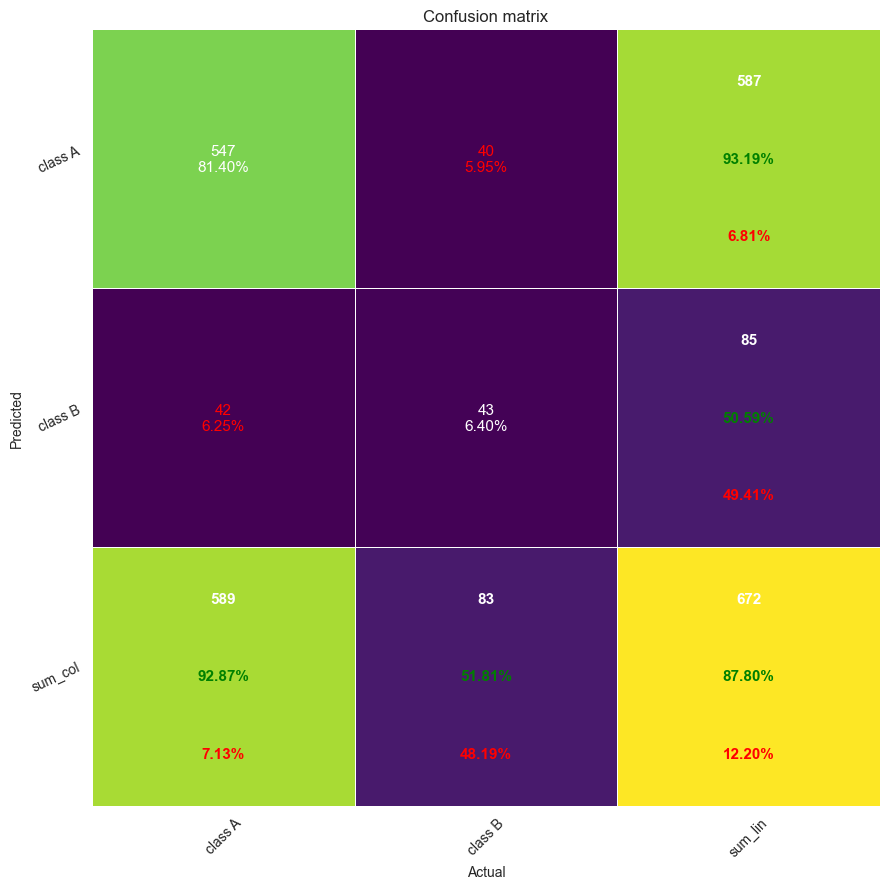

In [90]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Increase in **Precision** but decrease in **Recall** for class 1.

**Conclusion - third model training**: There is no significant improvement in performance.

## Random Oversampling

**Goal**: Use random oversampling to create balanced target classes.

In [91]:
oversampler = RandomOverSampler(random_state=13)
X_train_os, y_train_os= oversampler.fit_resample(X_train, y_train)

In [92]:
y_train_os.value_counts()

0    1317
1    1317
Name: Response, dtype: int64

Random Oversampling resulted dataset with **1317** entries of each class.

### Logistic Regression

In [93]:
model = LogisticRegression()
model.fit(X_train_os, y_train_os)

print("Train score:", model.score(X_train_os, y_train_os))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.8356112376613516
Test score:  0.8154761904761905


<AxesSubplot: >

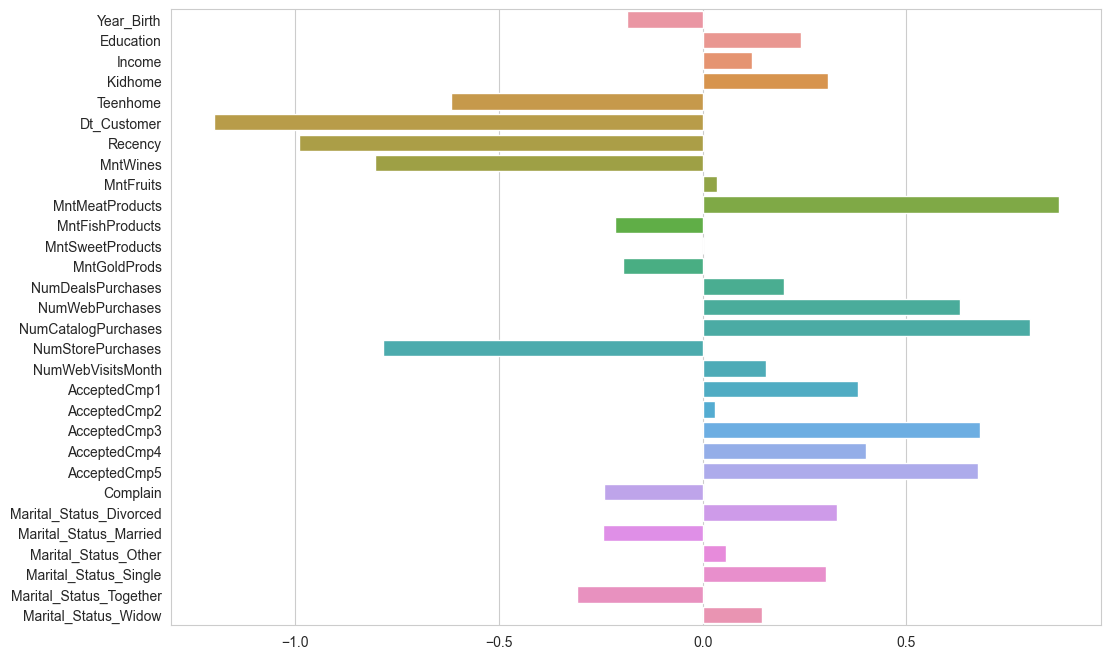

In [94]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train_os.columns, orient='horizontal')

In [95]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       589
           1       0.38      0.80      0.52        83

    accuracy                           0.82       672
   macro avg       0.67      0.81      0.70       672
weighted avg       0.89      0.82      0.84       672



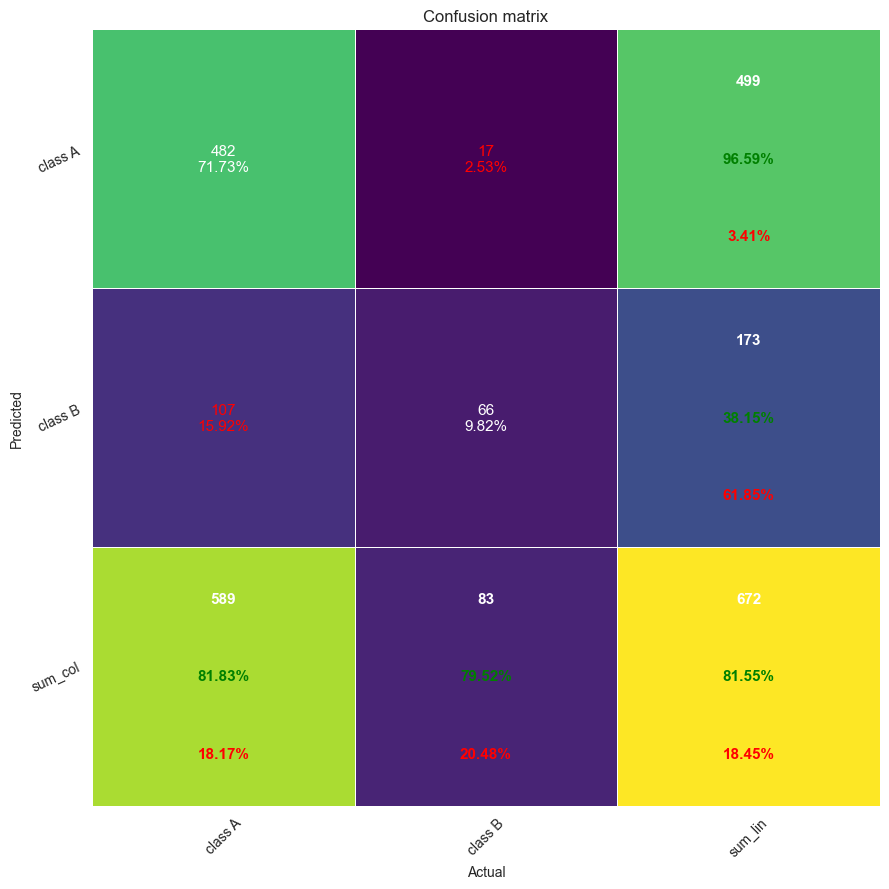

In [96]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: The **Recall** score for class 0 decreased, but significantly increased for class 1.

### K-Nearest Neighbours

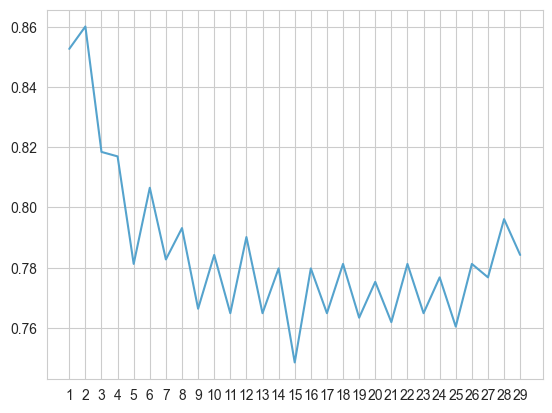

Best N value: 2


In [97]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train_os, y_train_os)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [99]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       589
           1       0.43      0.41      0.42        83

    accuracy                           0.86       672
   macro avg       0.67      0.67      0.67       672
weighted avg       0.86      0.86      0.86       672



In [ ]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Score for all metrics but **Recall** for class 1 decreased.

### Decision Tree

In [100]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_os, y_train_os)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [101]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

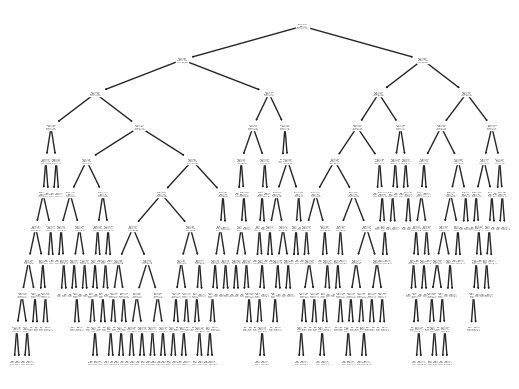

In [102]:
plot_tree(model)
plt.show()

In [103]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       589
           1       0.36      0.60      0.45        83

    accuracy                           0.82       672
   macro avg       0.65      0.72      0.67       672
weighted avg       0.87      0.82      0.84       672



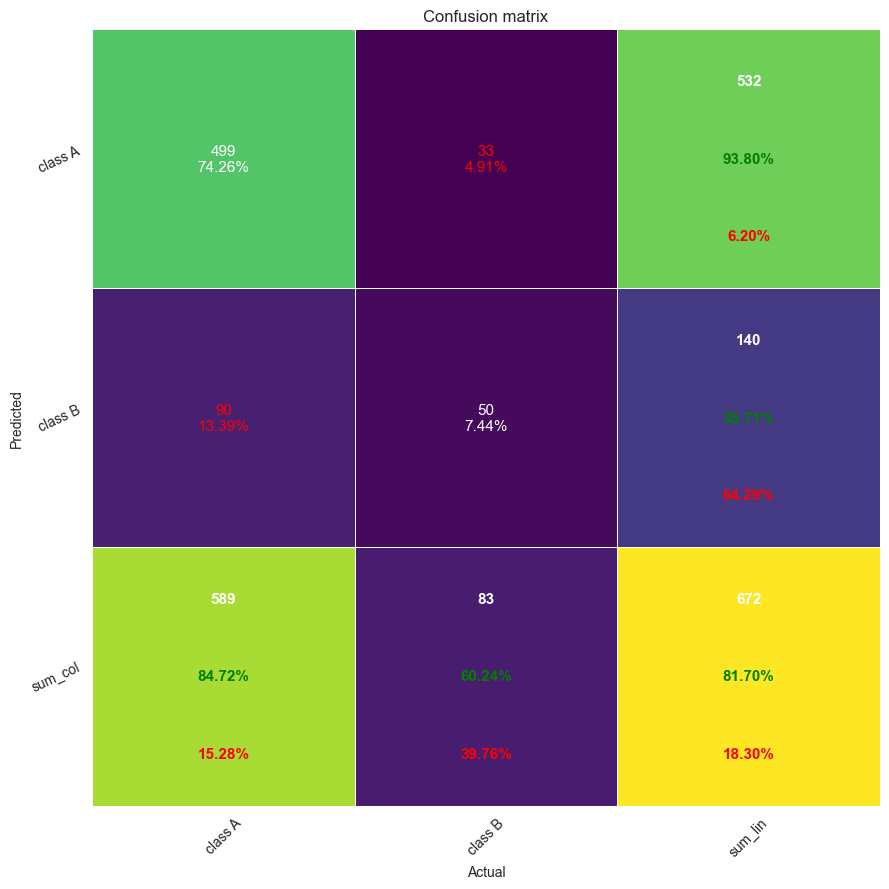

In [104]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: **Recall** improved for class 1.

### Random Forest

In [105]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_os, y_train_os)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [106]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [107]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       589
           1       0.53      0.63      0.57        83

    accuracy                           0.89       672
   macro avg       0.74      0.77      0.75       672
weighted avg       0.89      0.89      0.89       672



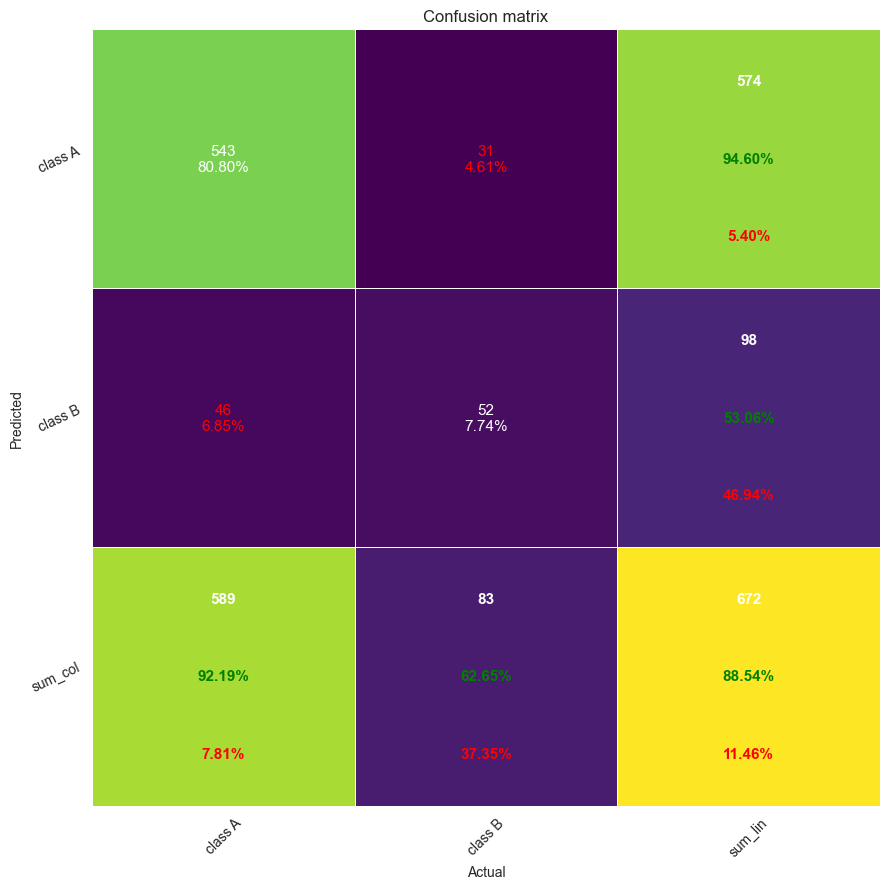

In [108]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

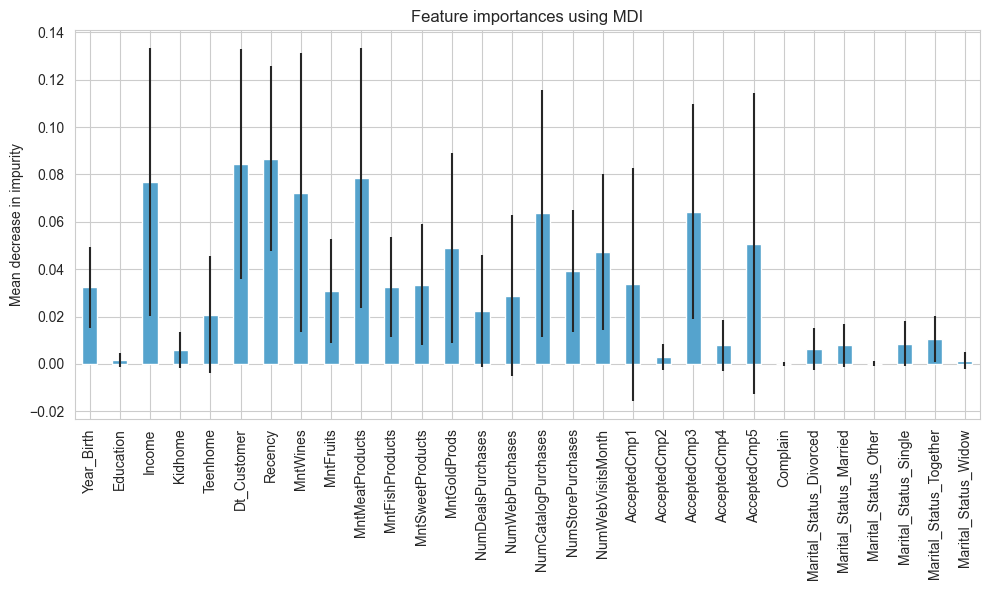

In [109]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: The **Precision** score decreased, but the **Recall** increased for class 1. No significant change for class 0.

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train_os, y_train_os)

In [111]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       589
           1       0.51      0.55      0.53        83

    accuracy                           0.88       672
   macro avg       0.72      0.74      0.73       672
weighted avg       0.88      0.88      0.88       672



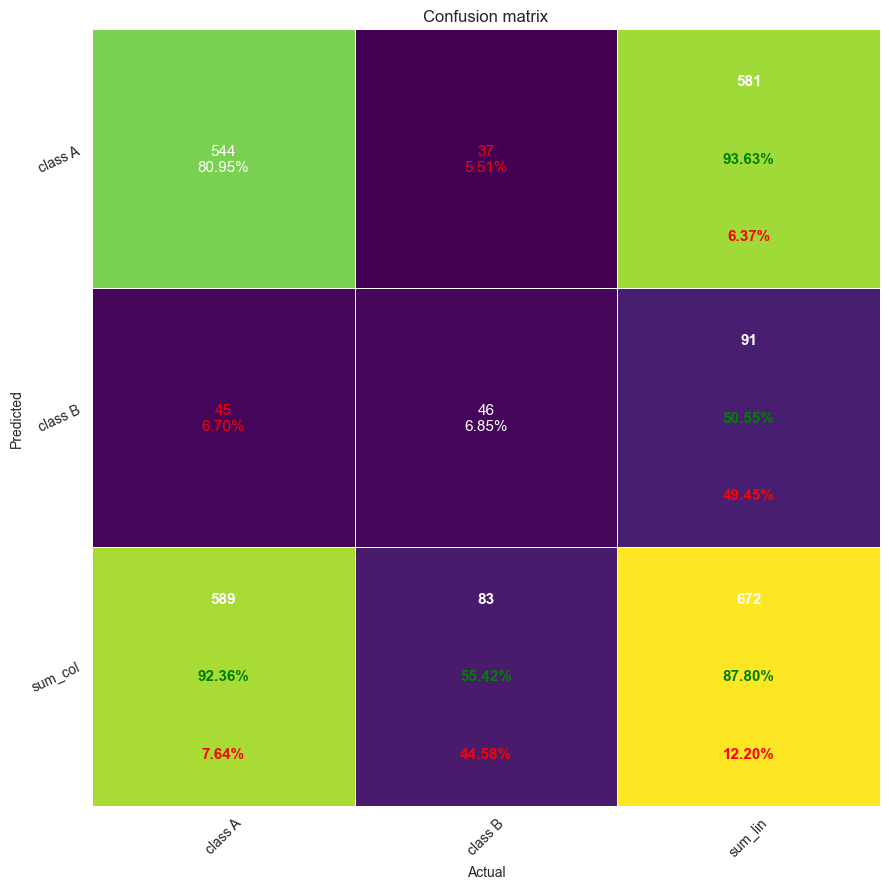

In [112]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: No significant change in SVC results.

**Conclusion - random oversampling**: Oversampling improved recall for class 1, but the overall model performance decreased.

## Synthetic Minority Oversampling (SMOTE)

**Goal**: Use SMOTE oversampling to create balanced target classes.

In [113]:
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [114]:
y_train_smote.value_counts()

0    1317
1    1317
Name: Response, dtype: int64

Synthetic Minority Oversampling resulted in **1317** entries of each class.

### Logistic Regression

In [115]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

print("Train score:", model.score(X_train_smote, y_train_smote))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.8583902809415338
Test score:  0.8244047619047619


<AxesSubplot: >

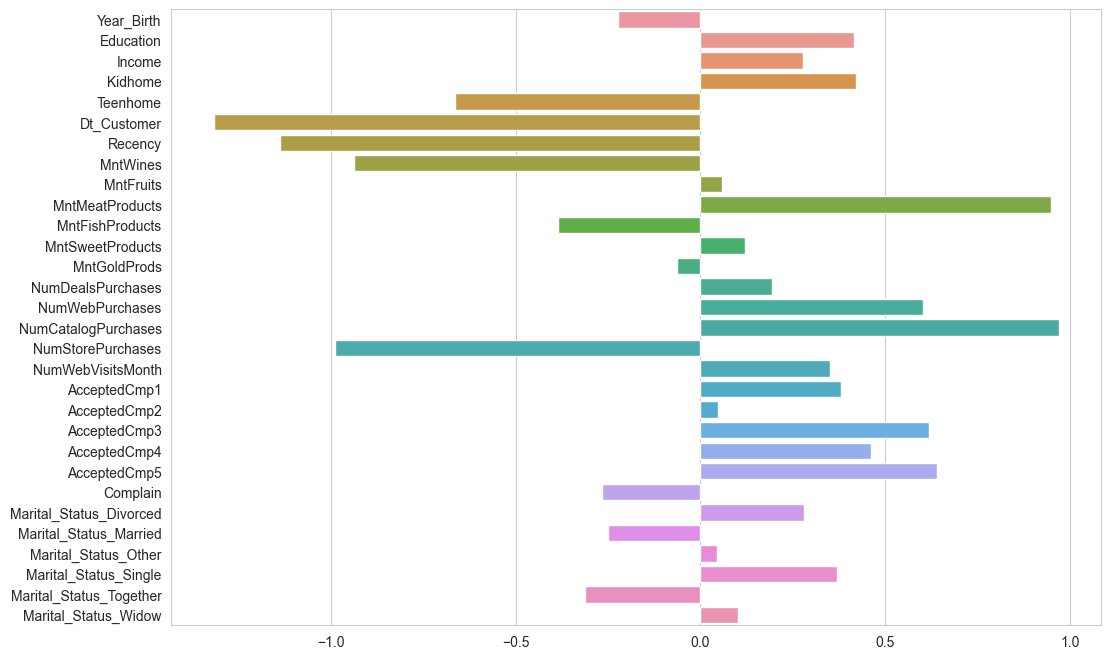

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train_os.columns, orient='horizontal')

In [117]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       589
           1       0.40      0.82      0.54        83

    accuracy                           0.82       672
   macro avg       0.68      0.82      0.71       672
weighted avg       0.90      0.82      0.85       672



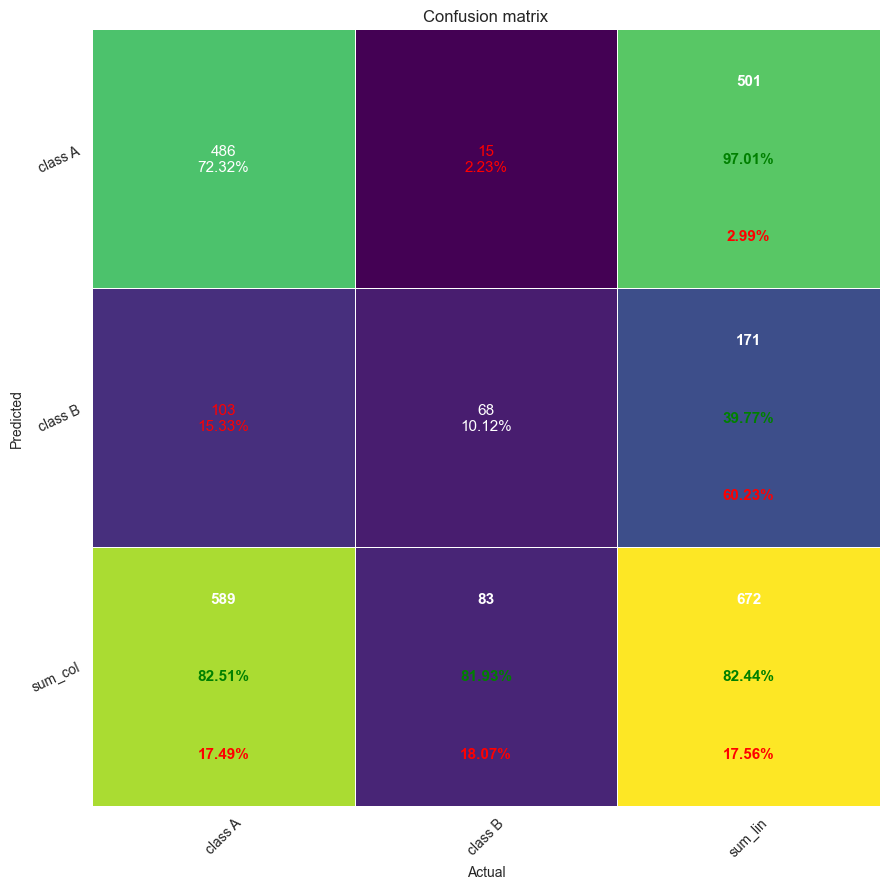

In [118]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Synthetic oversampling slightly improved performance for class 1.

### K-Nearest Neighbours

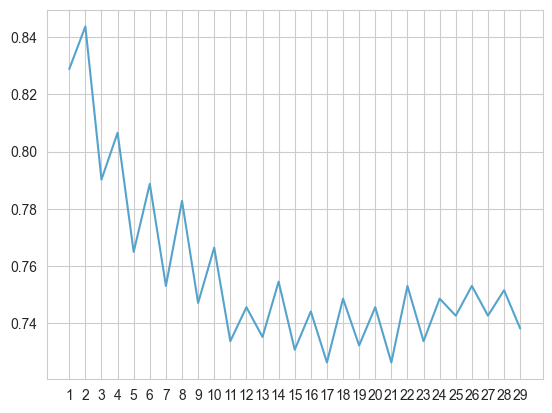

Best N value: 2


In [119]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train_smote, y_train_smote)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [120]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       589
           1       0.39      0.49      0.44        83

    accuracy                           0.84       672
   macro avg       0.66      0.69      0.67       672
weighted avg       0.86      0.84      0.85       672



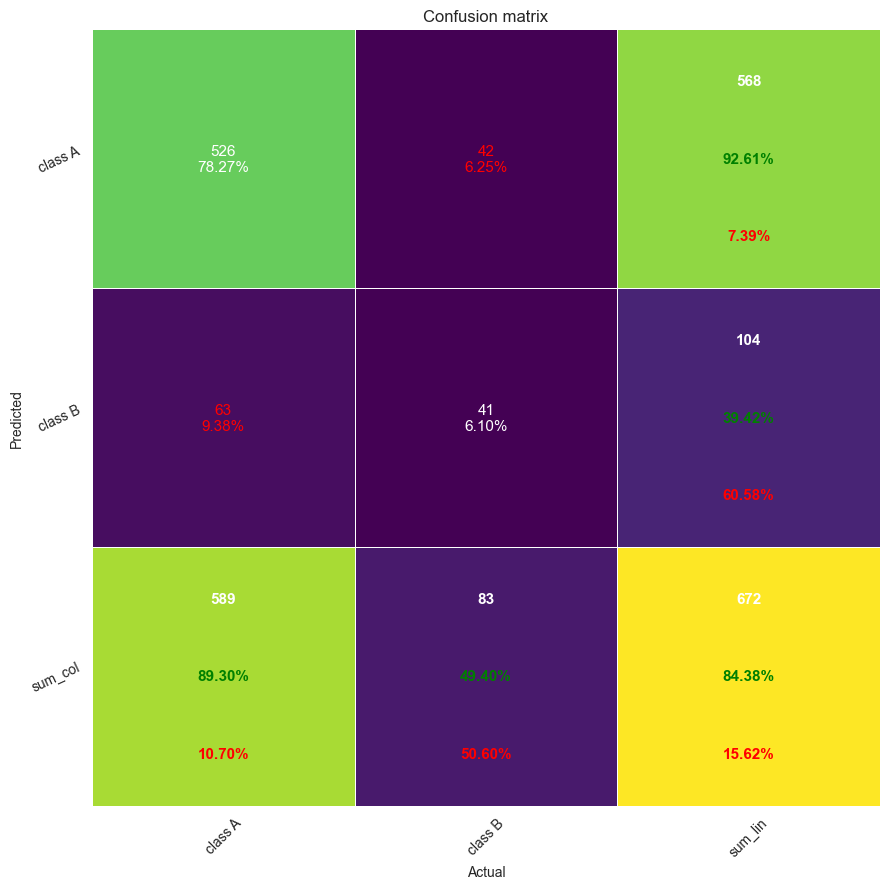

In [121]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Synthetic oversampling improved **Recall** score for class 1, but decreased the score for the other metrics.

### Decision Tree

In [122]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_smote, y_train_smote)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [123]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

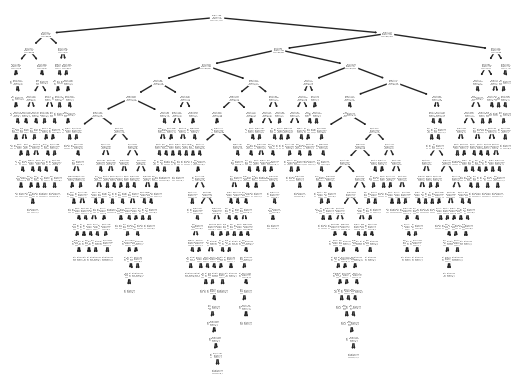

In [124]:
plot_tree(model)
plt.show()

In [125]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       589
           1       0.40      0.64      0.49        83

    accuracy                           0.83       672
   macro avg       0.67      0.75      0.69       672
weighted avg       0.88      0.83      0.85       672



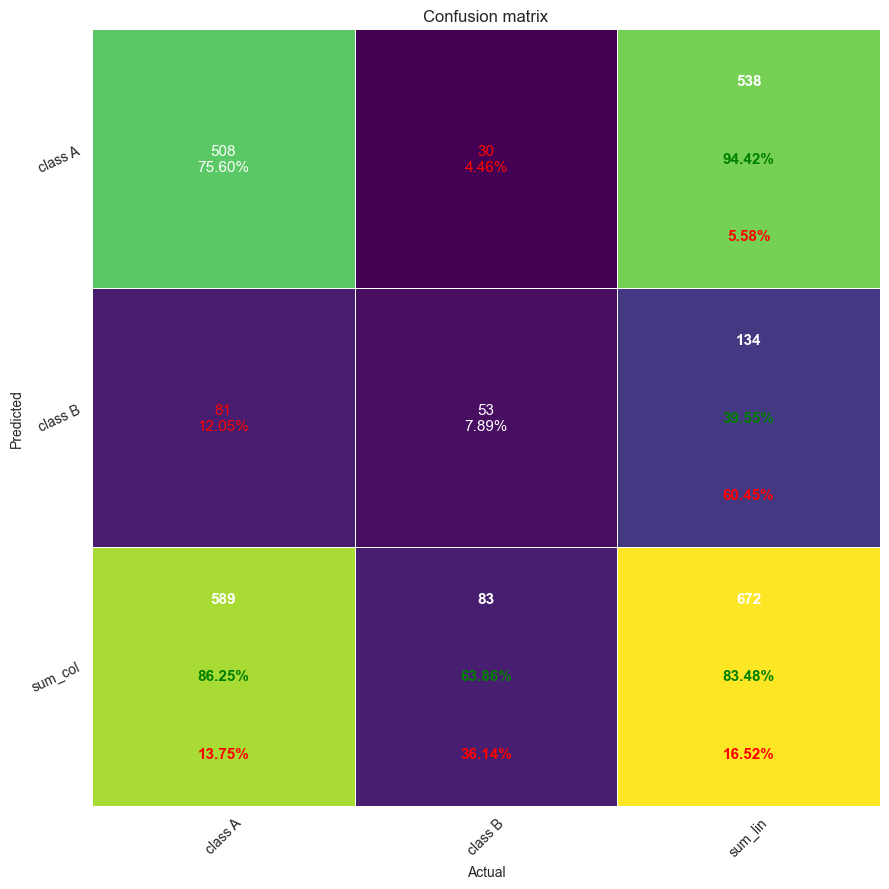

In [126]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: The Decision Tree performance scores decreased.

### Random Forest

In [127]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_smote, y_train_smote)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [128]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [129]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       589
           1       0.58      0.55      0.57        83

    accuracy                           0.90       672
   macro avg       0.76      0.75      0.75       672
weighted avg       0.89      0.90      0.89       672



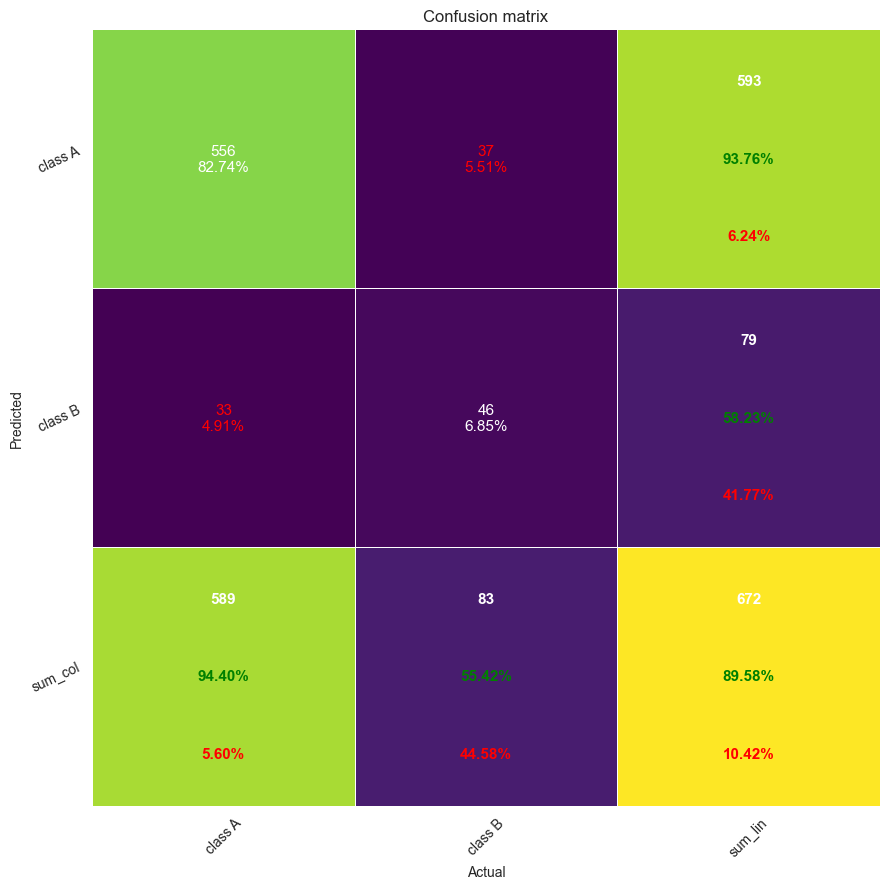

In [130]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

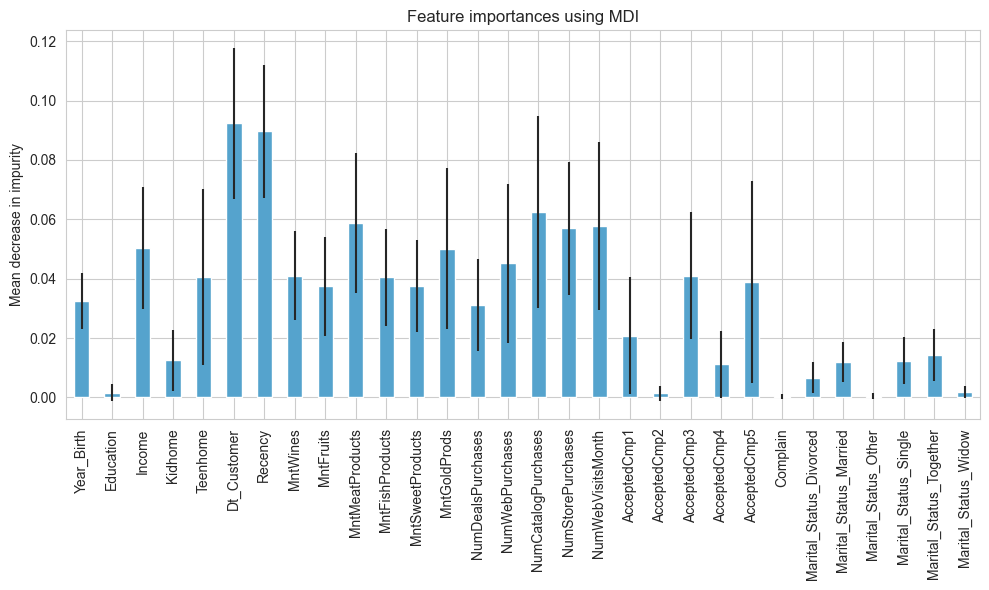

In [131]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: Synthetic oversampling improved the scores for class 1, compared to random oversampling.

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train_smote, y_train_smote)

In [133]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       589
           1       0.43      0.49      0.46        83

    accuracy                           0.86       672
   macro avg       0.68      0.70      0.69       672
weighted avg       0.87      0.86      0.86       672



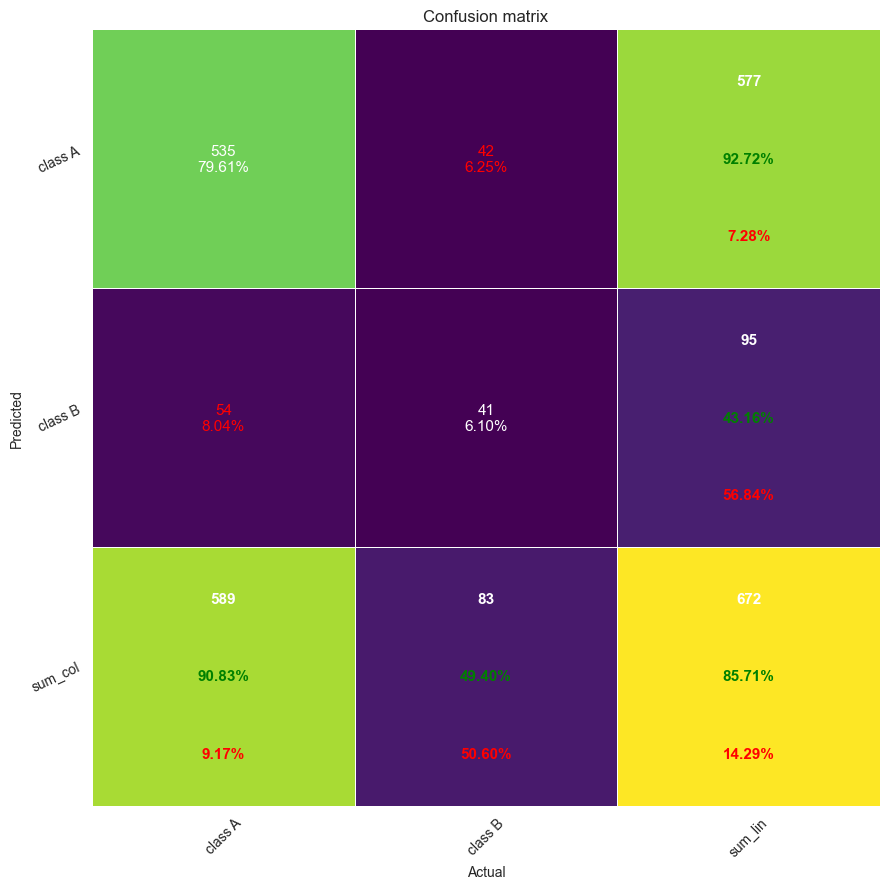

In [134]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: SVC performed better on randomly oversampled data than the SMOTE data.

**Conclusion - SMOTE oversampling**: The 'simpler' models trained on data, sampled with SMOTE oversampling, improved their performance, while the more complex models slightly decreased in performance.

## Random Undersampling

In [135]:
undersampler = RandomUnderSampler(random_state=13)
X_train_us, y_train_us= undersampler.fit_resample(X_train, y_train)

In [136]:
y_train_us.value_counts()

0    251
1    251
Name: Response, dtype: int64

Random Undersampling resulted in **251** entries of each class.

### Logistic Regression

In [137]:
model = LogisticRegression()
model.fit(X_train_us, y_train_us)

print("Train score:", model.score(X_train_us, y_train_us))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.8625498007968128
Test score:  0.8035714285714286


<AxesSubplot: >

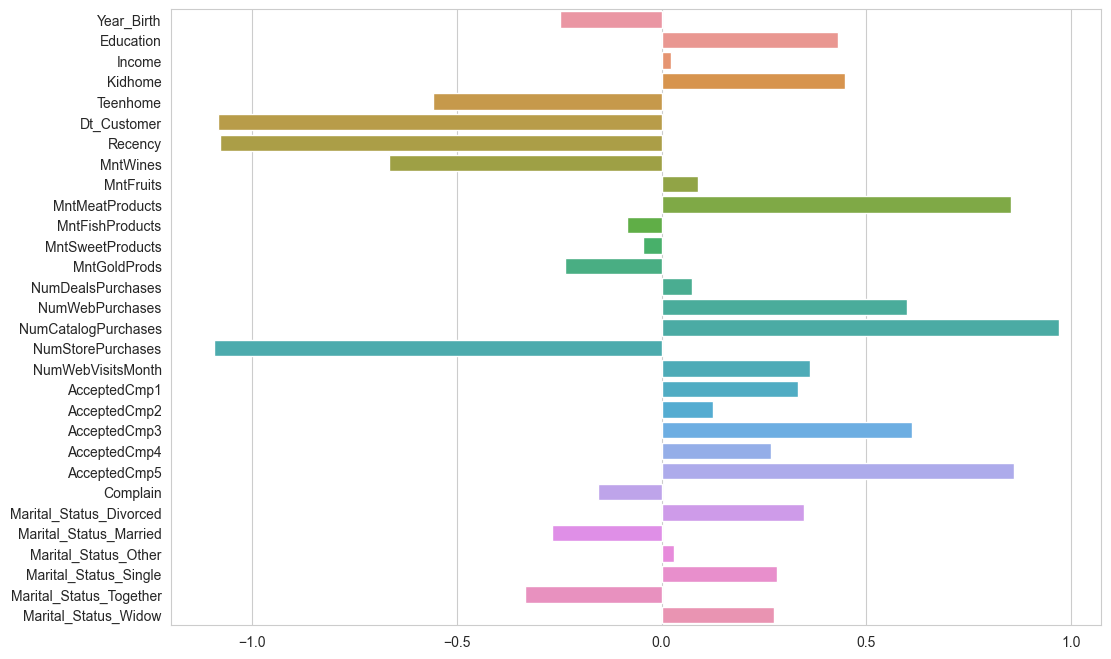

In [138]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train_us.columns, orient='horizontal')

In [139]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       589
           1       0.37      0.83      0.51        83

    accuracy                           0.80       672
   macro avg       0.67      0.82      0.69       672
weighted avg       0.90      0.80      0.83       672



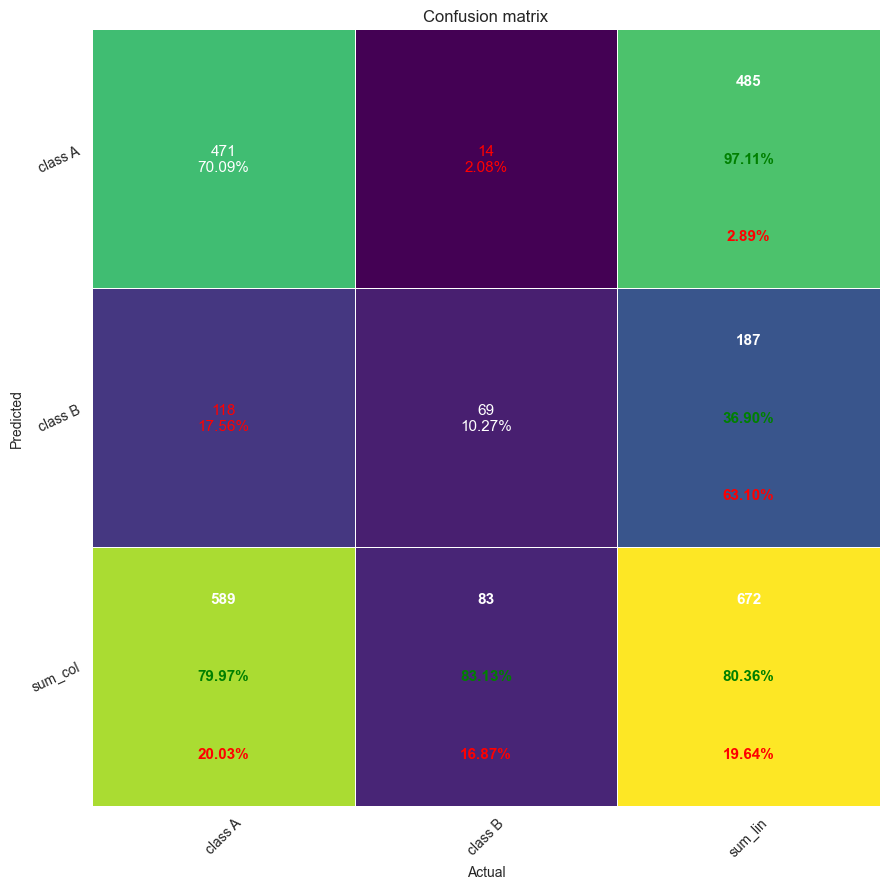

In [140]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Random undersampling resulted in **high Recall** score for class 1, but decrease in **Precision**.

### K-Nearest Neighbours

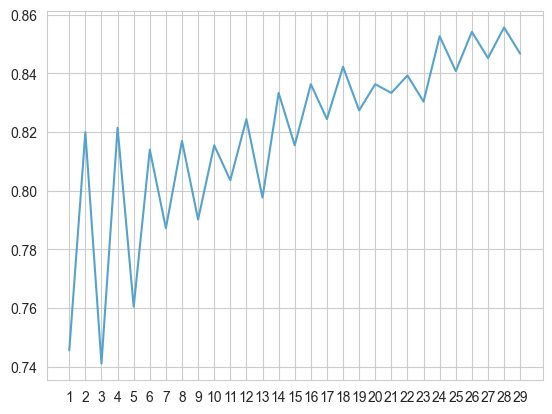

Best N value: 28


In [141]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train_us, y_train_us)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [142]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       589
           1       0.43      0.55      0.49        83

    accuracy                           0.86       672
   macro avg       0.68      0.73      0.70       672
weighted avg       0.87      0.86      0.86       672



In [ ]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conlusion**: KNN performs better on the undersampled data than on the oversampled.

### Decision Tree

In [143]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_us, y_train_us)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [144]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

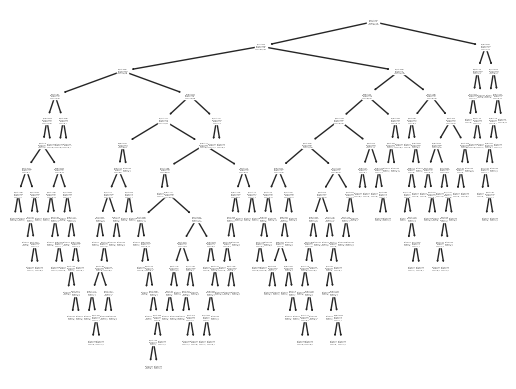

In [145]:
plot_tree(model)
plt.show()

In [146]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       589
           1       0.28      0.75      0.41        83

    accuracy                           0.73       672
   macro avg       0.62      0.74      0.62       672
weighted avg       0.87      0.73      0.78       672



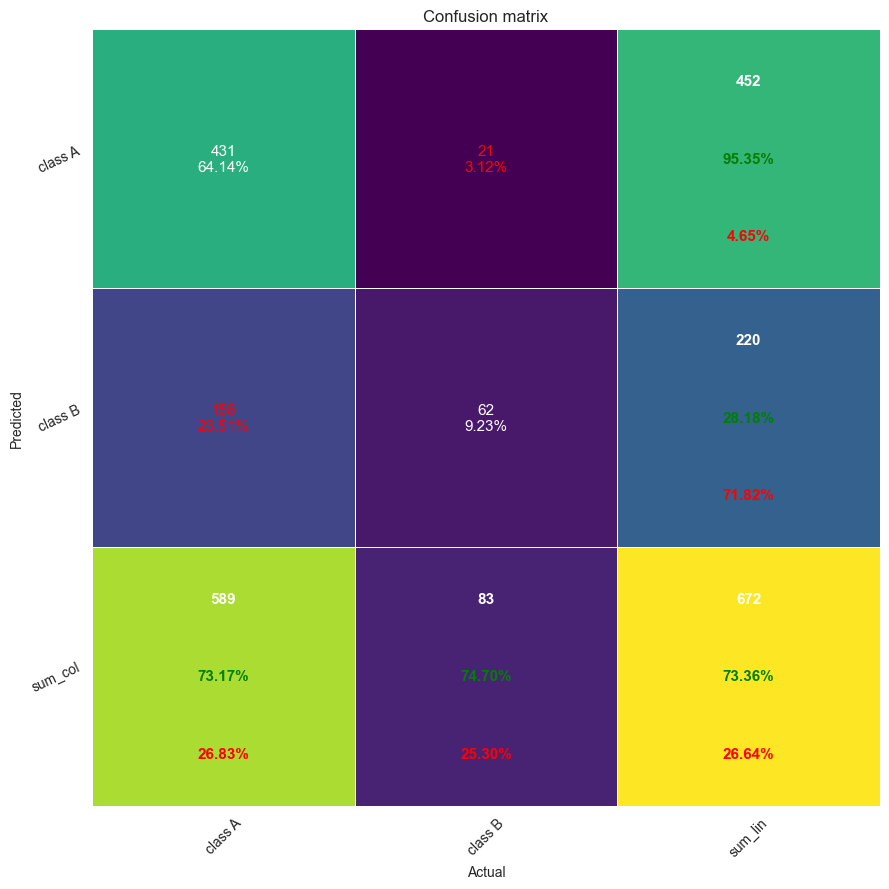

In [147]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: There is a significant decrease in **Recall** for class 0.

### Random Forest

In [148]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_us, y_train_us)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [149]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [150]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       589
           1       0.39      0.84      0.53        83

    accuracy                           0.82       672
   macro avg       0.68      0.83      0.71       672
weighted avg       0.90      0.82      0.84       672



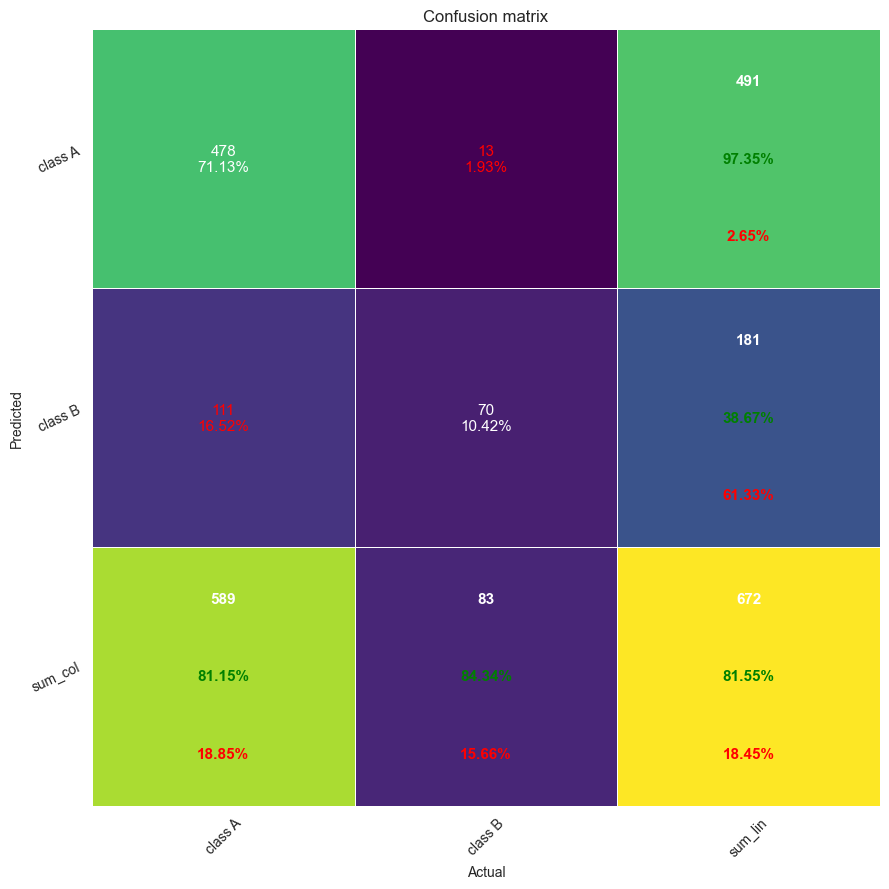

In [151]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

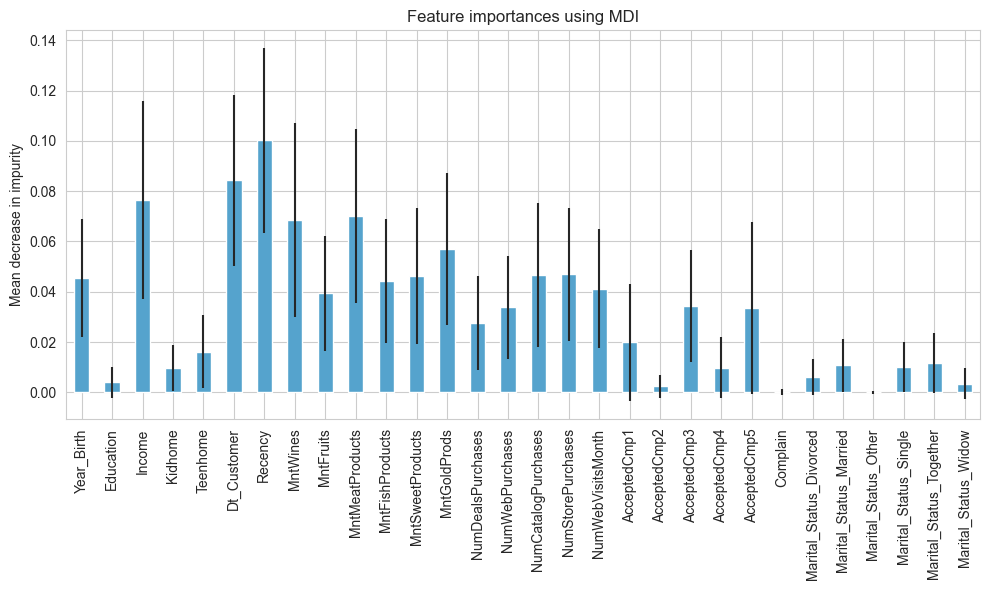

In [152]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: Random Forest has high **Recall** for class 1 and overall similar performance to Logistic Regression on the randomly undersampled data.

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train_us, y_train_us)

In [154]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       589
           1       0.36      0.78      0.49        83

    accuracy                           0.80       672
   macro avg       0.66      0.79      0.69       672
weighted avg       0.89      0.80      0.83       672



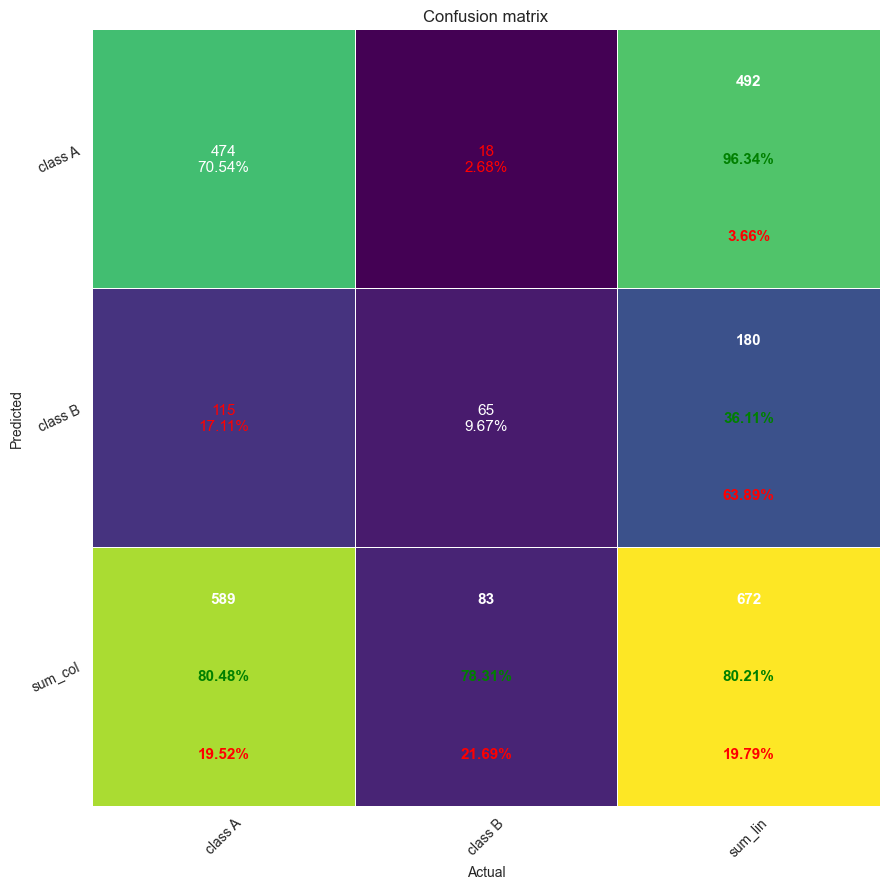

In [155]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: Random Forest performs better than SVC on the randomly undersampled data.

**Conclusion - random undersampling**: Random undersampling significantly improved **Recall** for class 1.

## Near-Miss Undersampling

**Goal**: Use NearMiss-3 undersampling to create balanced target classes.

In [158]:
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)

In [159]:
y_train_nearmiss.value_counts()

0    251
1    251
Name: Response, dtype: int64

Near-Miss oversampling resulted in **251** entries of each class.

### Logistic Regression

In [160]:
model = LogisticRegression()
model.fit(X_train_nearmiss, y_train_nearmiss)

print("Train score:", model.score(X_train_nearmiss, y_train_nearmiss))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.7928286852589641
Test score:  0.8199404761904762


<AxesSubplot: >

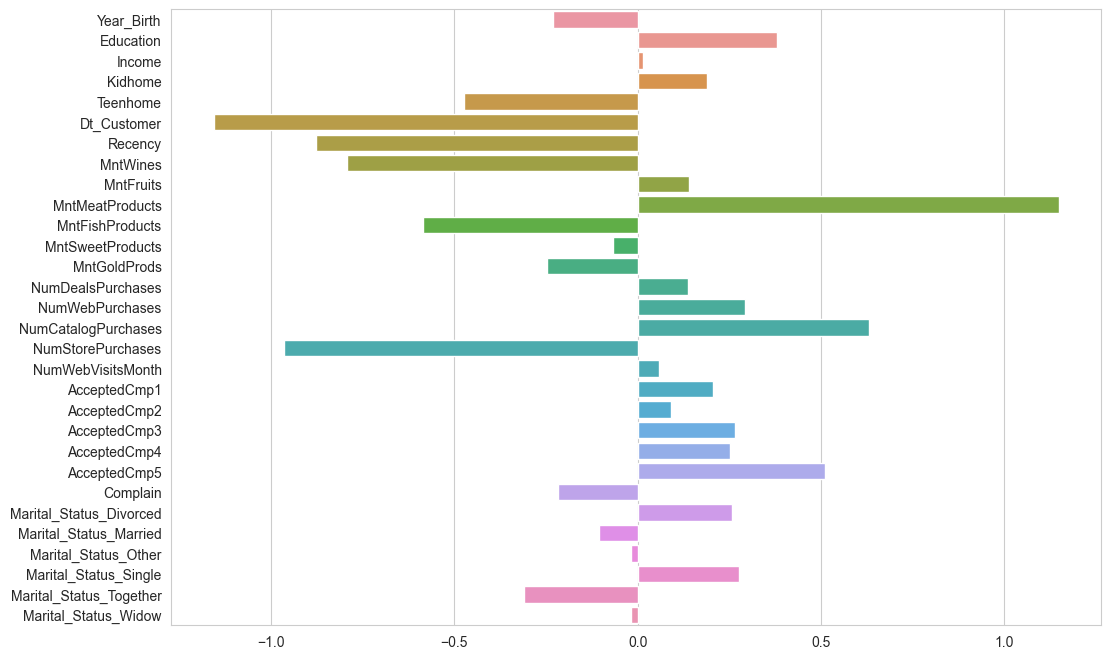

In [161]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train_os.columns, orient='horizontal')

In [162]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       589
           1       0.38      0.73      0.50        83

    accuracy                           0.82       672
   macro avg       0.67      0.78      0.70       672
weighted avg       0.89      0.82      0.84       672



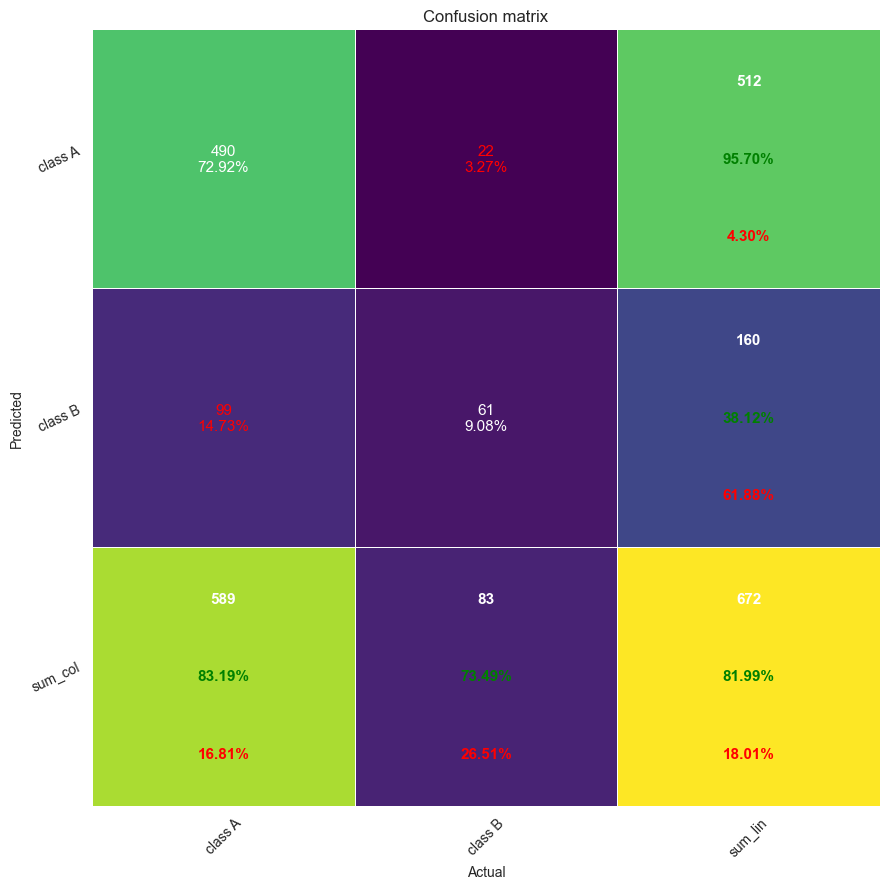

In [163]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: The Logistic Regression model performed better on the randomly undersampled data.

### K-Nearest Neighbours

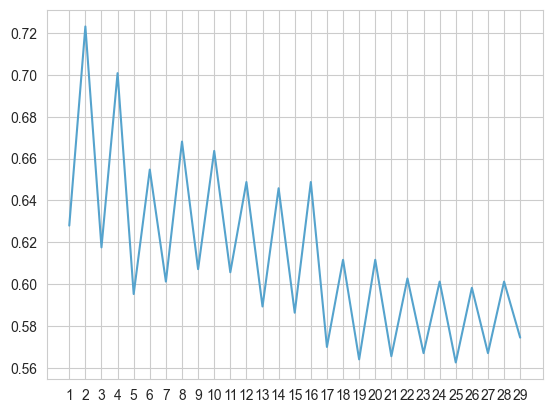

Best N value: 2


In [164]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    current_model.fit(X_train_nearmiss, y_train_nearmiss)

    score = current_model.score(X_test, y_test)

    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [165]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       589
           1       0.20      0.40      0.26        83

    accuracy                           0.72       672
   macro avg       0.55      0.58      0.55       672
weighted avg       0.81      0.72      0.76       672



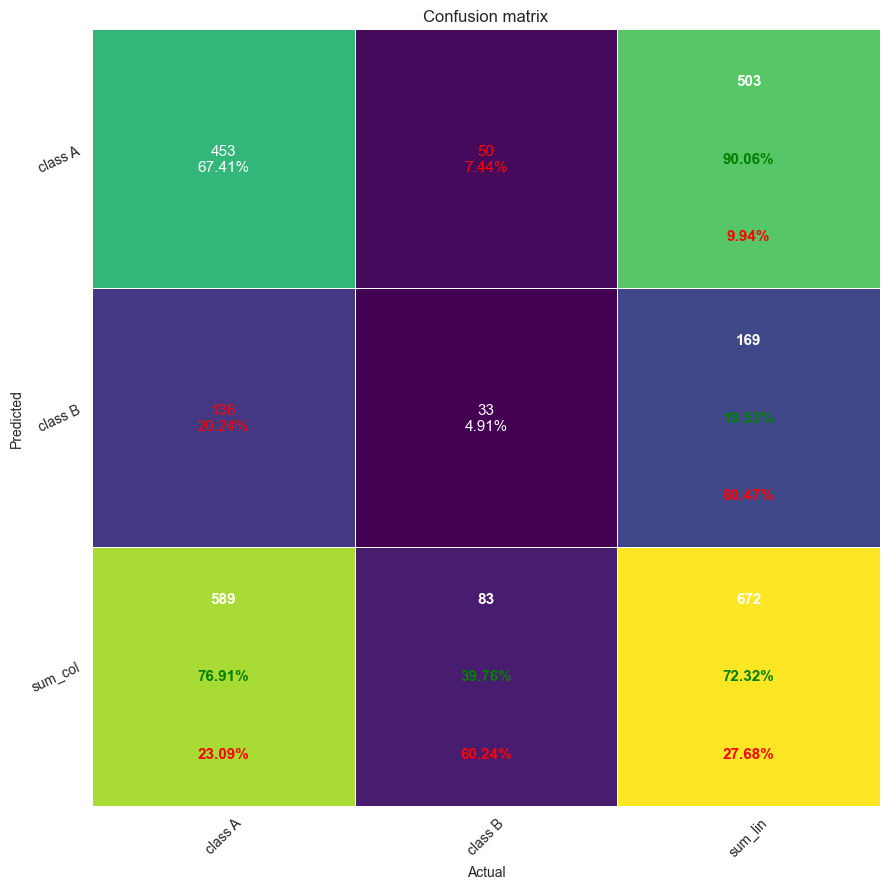

In [166]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: KNN performed better on the randomly undersampled data.

### Decision Tree

In [167]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_nearmiss, y_train_nearmiss)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [168]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

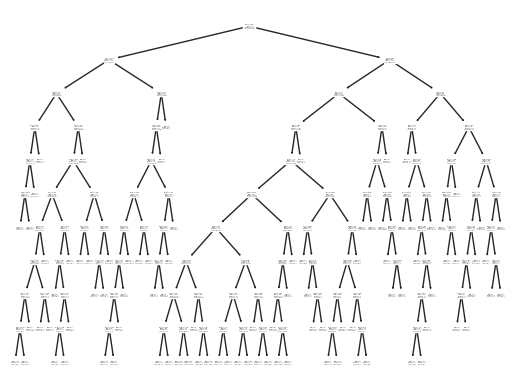

In [169]:
plot_tree(model)
plt.show()

In [170]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       589
           1       0.31      0.64      0.42        83

    accuracy                           0.78       672
   macro avg       0.63      0.72      0.64       672
weighted avg       0.86      0.78      0.81       672



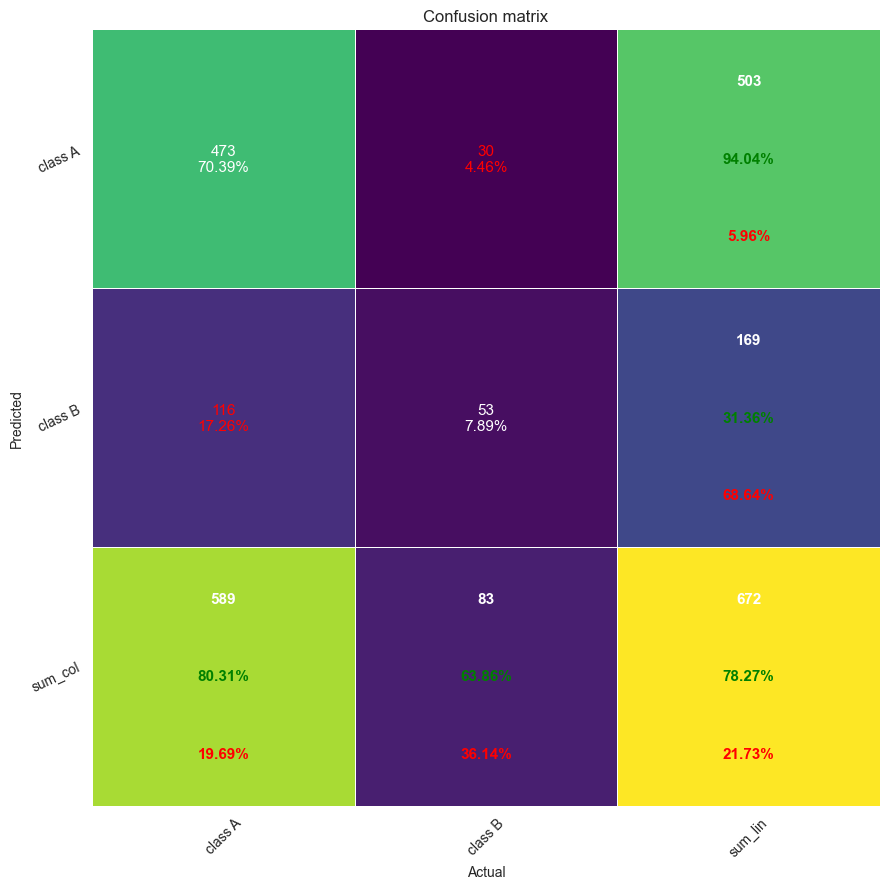

In [171]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: The Decision Tree model performed better on the randomly undersampled data.

### Random Forest

In [172]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train_nearmiss, y_train_nearmiss)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [173]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 1,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       589
           1       0.38      0.70      0.50        83

    accuracy                           0.82       672
   macro avg       0.67      0.77      0.69       672
weighted avg       0.88      0.82      0.84       672



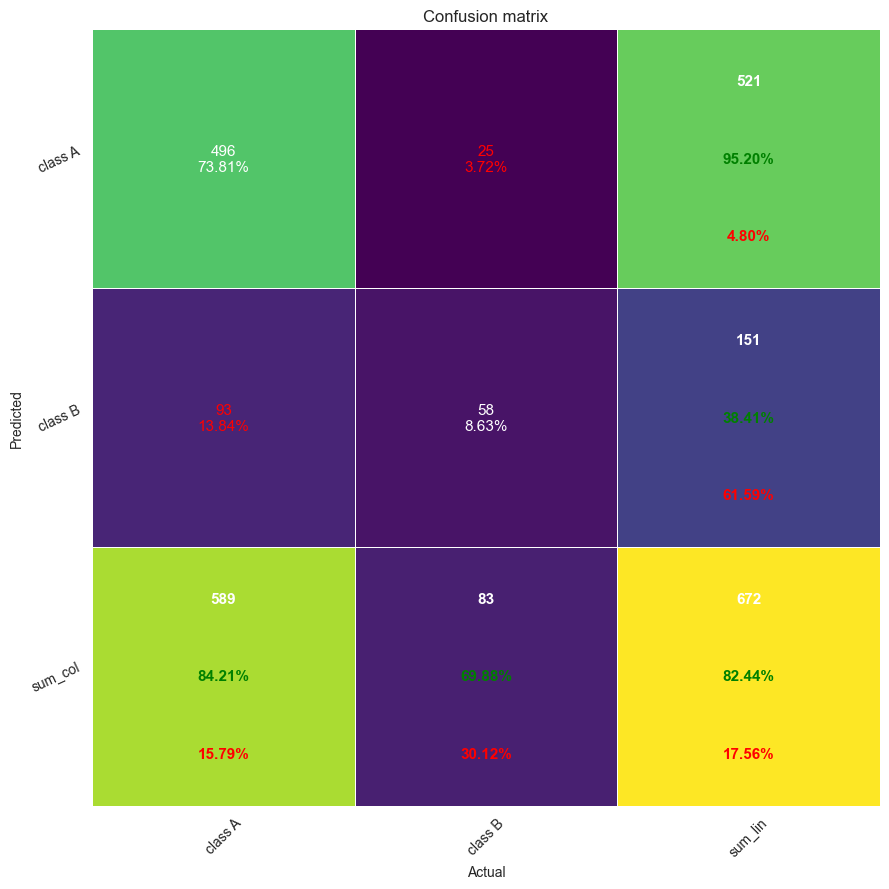

In [175]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

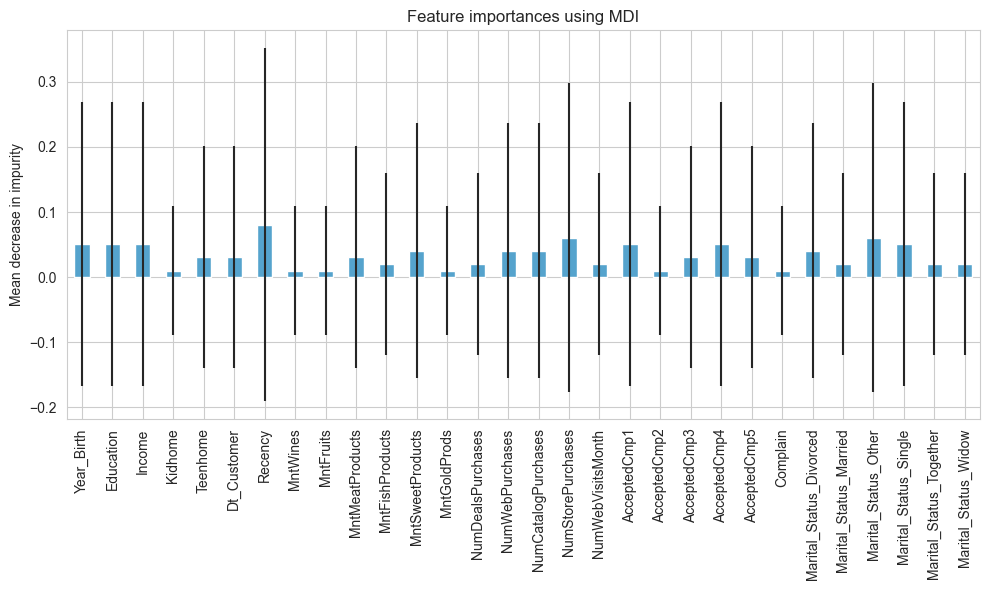

In [176]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=model.feature_names_in_)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Conclusion**: Random Forest performed better on the randomly undersampled data.

### Support Vector Classifier

In [ ]:
parameters={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'degree': [0, 1, 2, 3, 4, 5, 10],
    'gamma': ['scale', 'auto'],
}

model = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring='balanced_accuracy',
    verbose=2
)

model.fit(X_train_nearmiss, y_train_nearmiss)

In [178]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       589
           1       0.37      0.71      0.49        83

    accuracy                           0.82       672
   macro avg       0.66      0.77      0.69       672
weighted avg       0.88      0.82      0.84       672



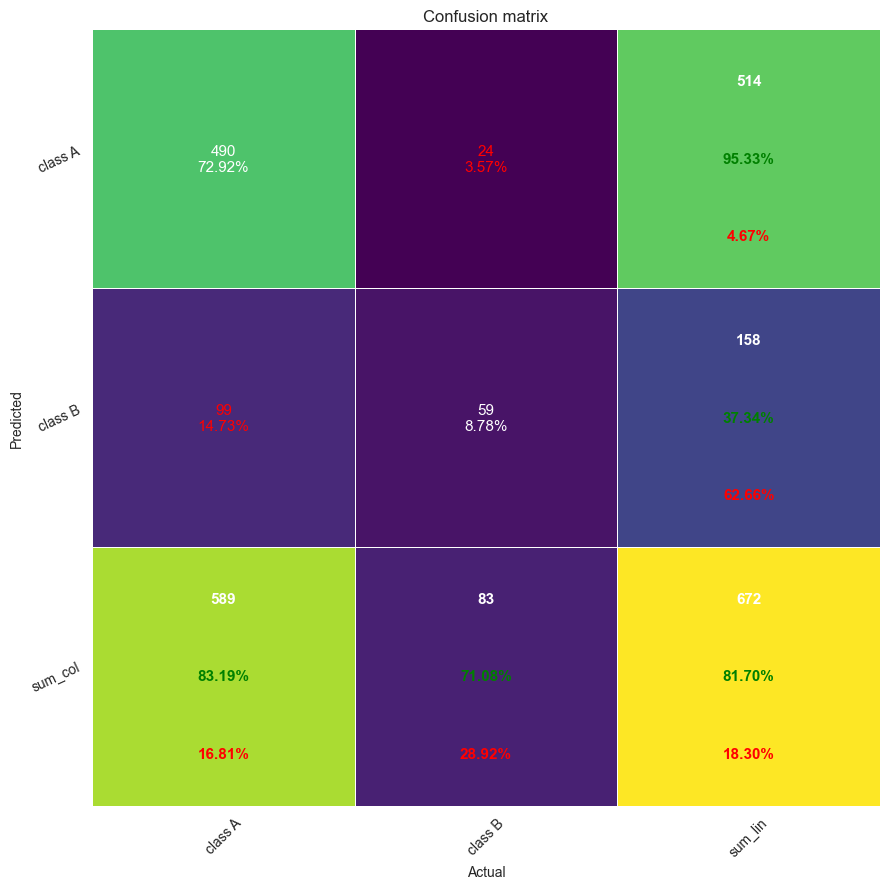

In [179]:
pp_matrix_from_data(y_test, y_pred, cmap='viridis', figsize=[2, 2])

**Conclusion**: The SVC model performed better on the randomly undersampled data.

**Conclusion - Near-Miss undersampling**: Models trained on data, sampled with Near-Miss undersampling, performed worse than the ones trained on the randomly undersampled data.